# Banks - Segmentation of users by product consumption

**Research task:**

For product managers of the regional bank "Metaprom" we need to analyze and segment clients by the number of consumed products, paying special attention to the churn rate. 

**Research goal:**

Retain clients in the bank and reduce churn. 

**Research plan:**

[**1. Data preprocessing**](#first)
- [1.1. Load libraries, load and check datasets](#first1)
- [1.2. Convert columns to convenient form, check data types, first look at the data](#first2)
- [1.3. Check data for anomalies, duplicate and missing values](#first3)
- [1.4. Set up a feature filter](#first4)
- [1.5. Preprocessing conclusions](#first5)

[**2. EDA**](#second) 
- [2.1. - 2.9. Distribution of categorical features](#second1) 
- [2.10. - 2.13. Distribution of numerical features](#second10) 
- [2.14. Correlation matrix](#second14) 
- [2.15. - 2.22. Analysis of client churn by categorical features](#second15) 
- [2.23. - 2.25. Analysis of client churn by numerical features](#second23) 
- [2.26. EDA conclusions](#second26) 

[**3. Segmentation**](#third)
- [3.1. Segmentation of users based on data on the number of products consumed](#third1)
- [3.2. - 3.9. Distribution of client segment by categorical features](#third2)
- [3.10. - 3.13 Distribution of client segment by numerical features](#third10)
- [3.14. Segmentation conclusions](#third14)

[**4. Hypothesis testing**](#fourth)
- [4.1. Formulation of statistical hypotheses - client income](#fourth1)
- [4.2. Testing statistical hypotheses - difference between segment incomes](#fourth2)
- [4.3. Formulation of statistical hypotheses - client churn](#fourth3)
- [4.4. Testing statistical hypotheses - difference between segment churn](#fourth4)
- [4.5. Hypothesis testing conclusions](#fourth5)


[**5. General conclusion and recommendations**](#fifth)


## **Link to presentation**

## https://drive.google.com/file/d/1-gWR7KIFgPHC6qHnPj7-I_cN2jB13UNy/view?usp=share_link

## Link to dashboard 

##  https://public.tableau.com/views/Dash_banks_Segmentation/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

## 1. Data preprocessing <a class="anchor" id="first"></a>

### 1.1. Load libraries, load and check datasets. <a class="anchor" id="first1"></a>

In [1]:
pip install matplotlib==3.5.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import datetime as dt
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import math as mth
from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('/Users/lqbaha/Downloads/datasets/bank_dataset.csv')

In [4]:
data = data.reset_index()

In [5]:
print('Dataset size:', data.shape[0])

Dataset size: 10000


In [6]:
data.head(10)

index    userid  score            City Gender  Age  Objects    Balance  \
0      0  15677338    619       Ярославль      Ж   42        2        NaN   
1      1  15690047    608         Рыбинск      Ж   41        1   83807.86   
2      2  15662040    502       Ярославль      Ж   42        8  159660.80   
3      3  15744090    699       Ярославль      Ж   39        1        NaN   
4      4  15780624    850         Рыбинск      Ж   43        2  125510.82   
5      5  15616748    645         Рыбинск      М   44        8  113755.78   
6      6  15635267    822       Ярославль      М   50        7        NaN   
7      7  15698884    376  Ростов Великий      Ж   29        4  115046.74   
8      8  15835101    501       Ярославль      М   44        4  142051.07   
9      9  15635125    684       Ярославль      М   27        2  134603.88   

   Products  CreditCard  Loyalty  estimated_salary  Churn  
0         1           1        1         101348.88      1  
1         1           0        1         112542.58      0  
2         3           1        0         113931.57      1  
3         2           0        0          93826.63      0  
4         1           1        1          79084.10      0  
5         2           1        0         149756.71      1  
6         2           1        1          10062.80      0  
7         4           1        0         119346.88      1  
8         2           0        1          74940.50      0  
9         1           1        1          71725.73      0

### 1.2. Convert columns to convenient form, check data types, first look at the data.  <a class="anchor" id="first2"></a>

In [7]:
#converted column names to snake_case type
data.columns = data.columns.str.lower()

In [8]:
data = data.rename(columns={'userid': 'user_id', 'creditcard' : 'credit_card'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10000 non-null  int64  
 1   user_id           10000 non-null  int64  
 2   score             10000 non-null  int64  
 3   city              10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   objects           10000 non-null  int64  
 7   balance           6383 non-null   float64
 8   products          10000 non-null  int64  
 9   credit_card       10000 non-null  int64  
 10  loyalty           10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  churn             10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [10]:
data['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [11]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

### 1.3. Check data for anomalies, duplicate and missing values. <a class="anchor" id="first3"></a>

In [12]:
#duplicate check
data.duplicated().sum()

0

There is no duplicates, we are unlikely to find implicit duplicates here, because the dataset for text columns (such as city) is correct. 

In [13]:
#missing values check
data.isna().sum()

index                  0
user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [14]:
round(data.isna().mean()*100, 2)

index                0.00
user_id              0.00
score                0.00
city                 0.00
gender               0.00
age                  0.00
objects              0.00
balance             36.17
products             0.00
credit_card          0.00
loyalty              0.00
estimated_salary     0.00
churn                0.00
dtype: float64

In [15]:
data["balance"].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

In [16]:
nan_data = data[data["balance"].isna()]

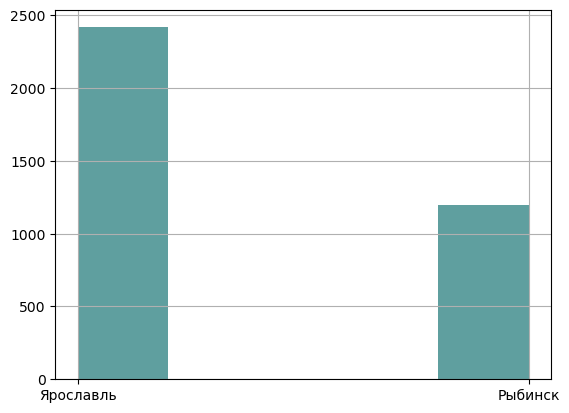

In [17]:
nan_data['city'].hist(bins = 5, color='#5F9F9F');
#nan_data['score'].hist(bins = 50)
#nan_data['age'].hist(bins = 50)
#nan_data['objects'].hist(bins = 50)
#nan_data['estimated_salary'].hist(bins = 50)

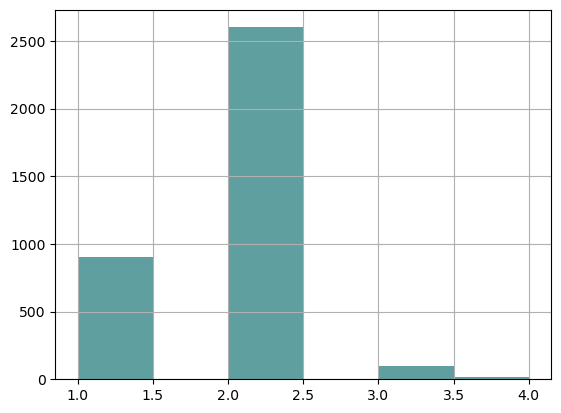

In [18]:
nan_data['products'].hist(bins = 6, color='#5F9F9F');

In [19]:
colors = ['lightblue', 'darkred']
fig = make_subplots(
   rows=1, cols=2,
   specs=[[
      {"type": "pie"},
      {"type": "pie"}
   ]]
)

# Set traces for the first pie chart
fig.add_trace(go.Pie(
   values=nan_data['churn'].value_counts().to_list(),
   labels=["churn", "no churn"]),   
   row=1, col=1
)
fig.update_layout(
    title_text="Correlation of missing data: churn/no churn, have a credit card/no credit card")

# Traces for the second pie chart
fig.add_trace(go.Pie(
   values=nan_data['credit_card'].value_counts().to_list(),
   labels=["no credit card", "have a credit card"]),
   row=1, col=2
)
fig.update_traces(marker=dict(
                  colors=colors))

There are missing values in the Balance column in amount of 3.617 rows, which is 36% from the total dataset. The quantity is decent, we will not delete it, just leave it as it is. But we will remember this, if there is any deviation in subsequent calculation, we will put a stub. 

Missing values were found only in banks in the cities of Yaroslavl and Rybinsk, 86% of missing values are with non-left clients, 70% do not have a credit card and most of the missings are with clients with 2 products in their ownership. The rest of the distribution is normal.
 
For some reason, the minimum value in the Balance column is not zero, but 3.768,69, which is very strange. Is it possible that out of 10 thousand clients, no one has any money in their account at all, or even a negative balance? 
The most likely this is the case, these are too small values, below the threshold of 3.768,69.


Let's take a look at the data:

In [20]:
data.describe(include='all')    

index       user_id         score       city gender  \
count   10000.00000  1.000000e+04  10000.000000      10000  10000   
unique          NaN           NaN           NaN          3      2   
top             NaN           NaN           NaN  Ярославль      М   
freq            NaN           NaN           NaN       5014   5457   
mean     4999.50000  1.573368e+07    650.528800        NaN    NaN   
std      2886.89568  7.193619e+04     96.653299        NaN    NaN   
min         0.00000  1.560844e+07    350.000000        NaN    NaN   
25%      2499.75000  1.567126e+07    584.000000        NaN    NaN   
50%      4999.50000  1.573347e+07    652.000000        NaN    NaN   
75%      7499.25000  1.579597e+07    718.000000        NaN    NaN   
max      9999.00000  1.585843e+07    850.000000        NaN    NaN   

                 age       objects        balance      products  credit_card  \
count   10000.000000  10000.000000    6383.000000  10000.000000  10000.00000   
unique           NaN           NaN            NaN           NaN          NaN   
top              NaN           NaN            NaN           NaN          NaN   
freq             NaN           NaN            NaN           NaN          NaN   
mean       38.921800      5.012800  119827.493793      1.530200      0.70550   
std        10.487806      2.892174   30095.056462      0.581654      0.45584   
min        18.000000      0.000000    3768.690000      1.000000      0.00000   
25%        32.000000      3.000000  100181.975000      1.000000      0.00000   
50%        37.000000      5.000000  119839.690000      1.000000      1.00000   
75%        44.000000      7.000000  139512.290000      2.000000      1.00000   
max        92.000000     10.000000  250898.090000      4.000000      1.00000   

             loyalty  estimated_salary         churn  
count   10000.000000      10000.000000  10000.000000  
unique           NaN               NaN           NaN  
top              NaN               NaN           NaN  
freq             NaN               NaN           NaN  
mean        0.515100     100090.239881      0.203700  
std         0.499797      57510.492818      0.402769  
min         0.000000         11.580000      0.000000  
25%         0.000000      51002.110000      0.000000  
50%         1.000000     100193.915000      0.000000  
75%         1.000000     149388.247500      0.000000  
max         1.000000     199992.480000      1.000000

We found some very strange value of 11,58 in the salary. Let's take a closer look. 

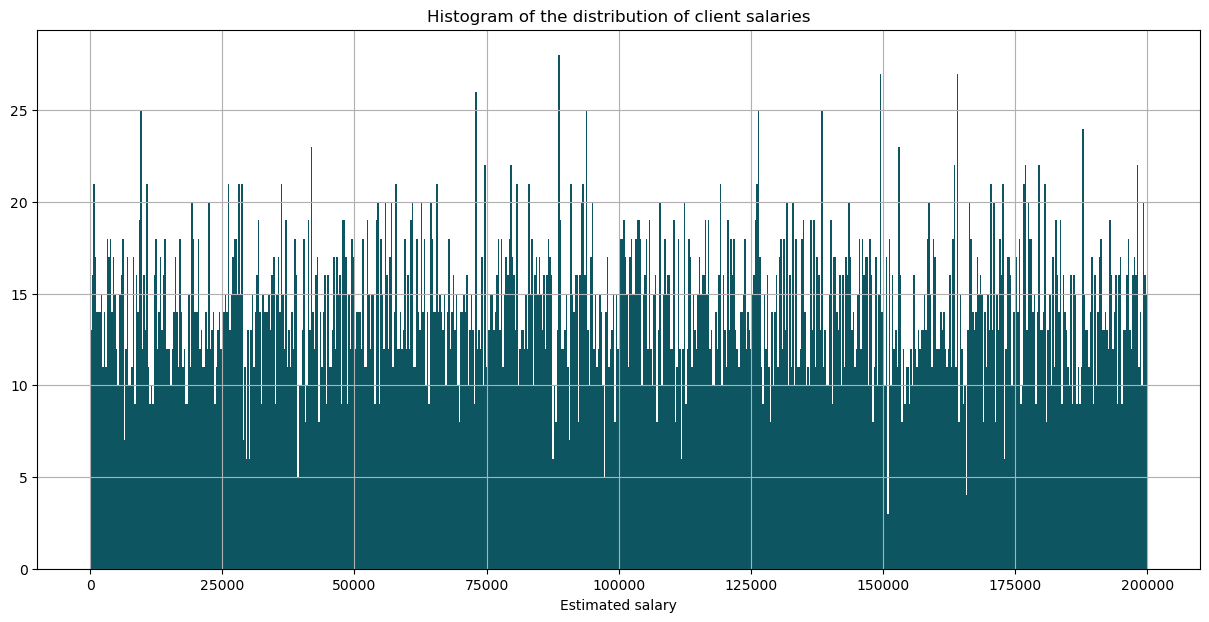

In [21]:
plt.figure(figsize = (15, 7))
data['estimated_salary'].hist(bins = 700, color='#0D5661')
plt.title("Histogram of the distribution of client salaries") 
plt.xlabel('Estimated salary')
plt.show()

In [22]:
pd.qcut(data['estimated_salary'], q=10, precision=0).value_counts()

(11.0, 20274.0]         1000
(20274.0, 41051.0]      1000
(41051.0, 60736.0]      1000
(60736.0, 80238.0]      1000
(80238.0, 100194.0]     1000
(100194.0, 119710.0]    1000
(119710.0, 139432.0]    1000
(139432.0, 159837.0]    1000
(159837.0, 179675.0]    1000
(179675.0, 199992.0]    1000
Name: estimated_salary, dtype: int64

10% of the bank's clients receive up to the 25 thousand. But the distribution itself looks quite normal and even. We will keep it in mind, and in some case - we will filter by 5% of the lowest and 5% of the highest salaries. 

### 1.4. Set up a feature filter <a class="anchor" id="first4"></a>

Let's add a division of categories by age and income. Make 4 groups in each and add in new columns. 


In [23]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

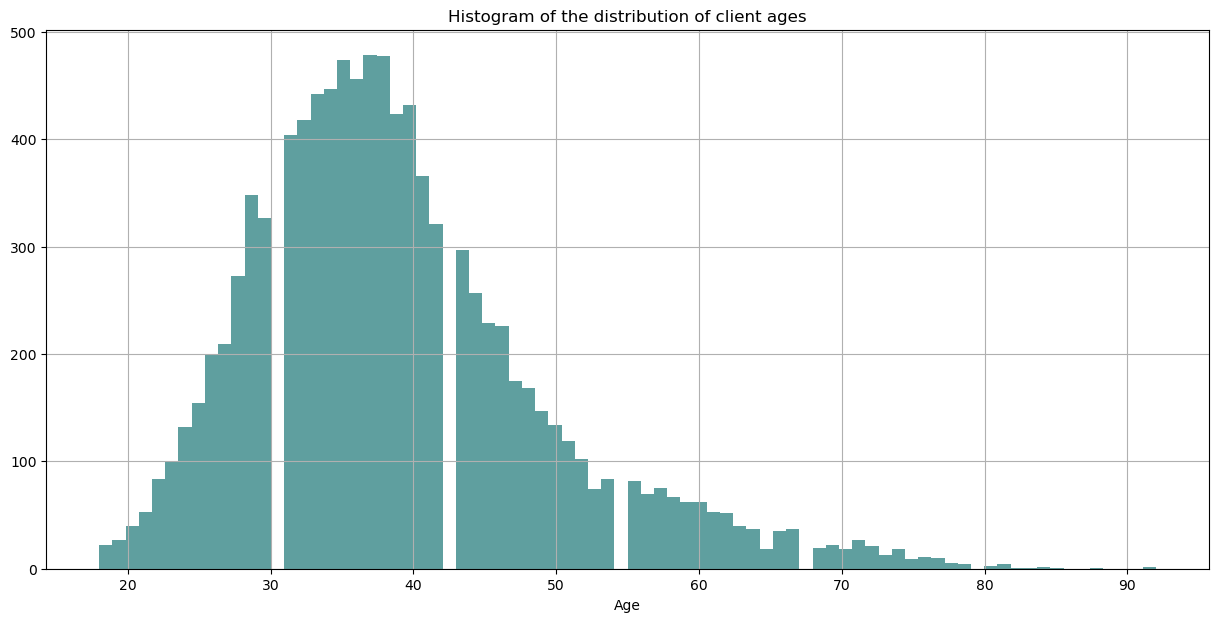

In [24]:
plt.figure(figsize = (15, 7))
data['age'].hist(bins = 80, color= '#5F9F9F')
plt.title("Histogram of the distribution of client ages") 
plt.xlabel('Age')
plt.show()

In [25]:
cut_labels = ['18-36', '36-55', '55-73', '73-92']
cut_bins = [17, 36, 55, 73, 92]


data['age_group'] = pd.cut(data['age'],
                       bins=cut_bins,
                       labels=cut_labels)

In [26]:
data['age_group'].describe()

count     10000
unique        4
top       18-36
freq       4609
Name: age_group, dtype: object

Now let's divide the clients into 4 groups according to the level of salaries, we will use quantiles for separation. 

In [27]:
pd.qcut(data['estimated_salary'], q=4).value_counts()

(11.579, 51002.11]          2500
(51002.11, 100193.915]      2500
(100193.915, 149388.248]    2500
(149388.248, 199992.48]     2500
Name: estimated_salary, dtype: int64

In [28]:
cut_labels = ['0-50к', '50-100к', '100-150к', '150-200к']
cut_bins = [11, 50000, 100000, 150000, 200000]


data['salary_level'] = pd.cut(data['estimated_salary'],
                       bins=cut_bins,
                       labels=cut_labels)
data.head()

index   user_id  score       city gender  age  objects    balance  \
0      0  15677338    619  Ярославль      Ж   42        2        NaN   
1      1  15690047    608    Рыбинск      Ж   41        1   83807.86   
2      2  15662040    502  Ярославль      Ж   42        8  159660.80   
3      3  15744090    699  Ярославль      Ж   39        1        NaN   
4      4  15780624    850    Рыбинск      Ж   43        2  125510.82   

   products  credit_card  loyalty  estimated_salary  churn age_group  \
0         1            1        1         101348.88      1     36-55   
1         1            0        1         112542.58      0     36-55   
2         3            1        0         113931.57      1     36-55   
3         2            0        0          93826.63      0     36-55   
4         1            1        1          79084.10      0     36-55   

  salary_level  
0     100-150к  
1     100-150к  
2     100-150к  
3      50-100к  
4      50-100к

In [29]:
data['salary_level'].describe()

count        10000
unique           4
top       100-150к
freq          2555
Name: salary_level, dtype: object

### 1.5. Preprocessing conclusions.  <a class="anchor" id="first5"></a>

The dataset contains data on the clients of Metanprom bank, 1000 unique rows, without duplicates. 

Columns:

- `user_id` — unique id of the user,
- `score` — credit scroing points (all banks have their own calculation methods, but the principle is the same:  various characteristics of the borrower are assigned a specific weight or points, paying most attention to credit history),
- `city` —  Yaroslavl (50% of the data, Rybinsk and Rostov the Great for 25% of the data,
- `gender`,
- `age` — from 18 to 92 years, average age of a bank client - 39 years,
- `objects` — number of objects in the property (maximum - 10, average - 5),
- `balance` — account balance (36% of missing values),
- `products` — number of products used by the client,
- `credit_card` — does the client have a credit card,
- `loyalty` — is the client active,
- `estimated_salary` — client salary,
- `churn` — the client left the bank or not.

The `credit_card`, `loyalty` and `churn` columns have a boolean data type, but we will leave it as 1/0 (1 = Yes, 0 = No).


Added an Age category, dividing all bank clients into 4 groups `age_group`:
 - 18-36, 
 - 36-55, 
 - 55-73, 
 - 73-92
 
Added salary level for clients -  `salary_level`: 
 - 0-50к, 
 - 50-100к, 
 - 100-150к, 
 - 150-200к. 
 
(But we keep in mind that not all clients of Metanprom bank use this bank for a salary project, so this column has both very small and very large values.)  
 
There are missing values in the `Balance` column in amount of 3.617 rows, which is 36% from the total dataset. The percentage is sufficient, so we do not delete it, but for now just leave it as it is. But we will remember this, if there is any deviation in subsequent calculation, we will put a stub.

Missing values were found only in banks in the cities of Yaroslavl and Rybinsk, 86% of missing values are with non-left clients, 70% do not have a credit card and most of the missings are with clients with 2 products in their ownership. The rest of the distribution is normal.

For some reason, the minimum value in the `Balance` column is not zero, but 3.768,69, which is very strange. Is it possible that out of 10 thousand clients, no one has any money in their account at all, or even a negative balance? The most likely this is the case, these are too small values, below the threshold of 3.768,69.

In `Balance` column - values less than 3.768,69 do not appear in the data at all - most likely our missing values are just values from the minimum set to zero and, if possible, less than zero. 

## 2. EDA. <a class="anchor" id="second"></a>


Let's begin to explore our data and its distribution in more detail. 

In [30]:
palette = ['#5F9F9F', '#0D5661', '#F2C3B2', '#FEF5E4', '#DCD9BF', 
           '#ACE0F9', '#BBB5D3', '#1F8AC7', '#C8D5EB', '#74BDEF', '#5F9F9F']
sea.set_palette(palette=palette)
sea.set_style("whitegrid")

In [31]:
#this is a function that will draw barplots by categorical features 

#it is city, gender, objects, products, credit_card, loyalty, churn and new columns - age_group and salary_level

def barplots(column):
    plt.figure(figsize=(10,5))
    sea.barplot(data=data.groupby(column)['index'].count().reset_index().sort_values('index', ascending=False),
            x=column, 
            y='index')
    plt.ylabel('Number of clients')
    plt.xlabel(' ')
    plt.title(f'Distribution of clients by column {column}')
    return plt.show()

In [32]:
#this is a function that will draw displots by numeric features 

#it's columns score, age, balance and estimated_salary

def displot(column):
    plt.figure(figsize=(10,5))
    sea.distplot(data[column], bins=25) 
    plt.ylabel('Number of clients')
    plt.xlabel(' ') 
    plt.title(f'Distribution of clients by column {column}')
    return plt.show()

### 2.1. Distribution of clients by cities <a class="anchor" id="second1"></a> 

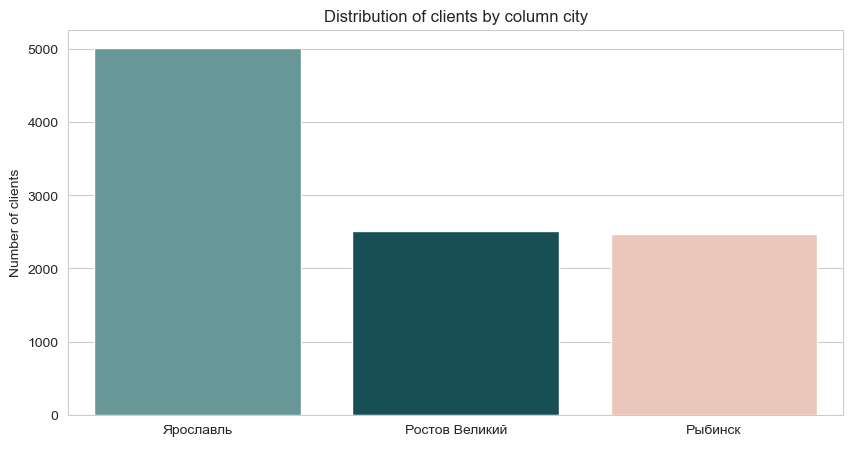

In [33]:
barplots('city')

The number of clients in the bank distributed very evenly - 50% in Yaroslavl, the remaining 50% are equally divided by Rybinsk and Rostov the Great. 

### 2.2. Distribution of clients by gender

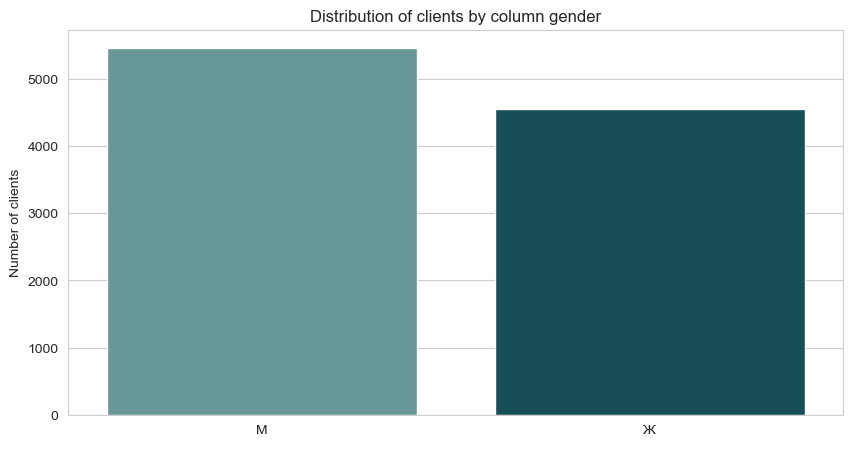

In [34]:
barplots('gender')

There are a thousand more male clients in the bank than female clients. 

### 2.3. Distribution of clients by the number of object used

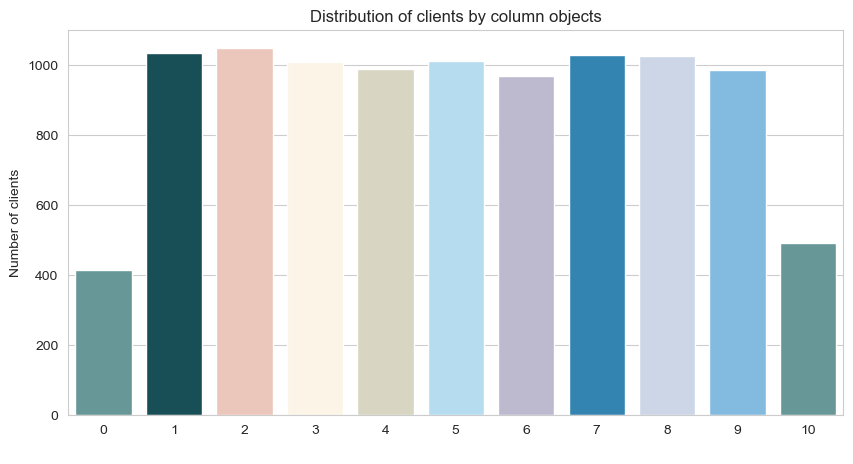

In [35]:
barplots('objects')

The least number of bank clients who do not have any objects at all. 

Slightly more than those who own objects - the maximum number (10). 

2 objects, 1 object and 7 objects - our top-3 in terms of client distribution.

### 2.4. Distribution of clients by number of products used.

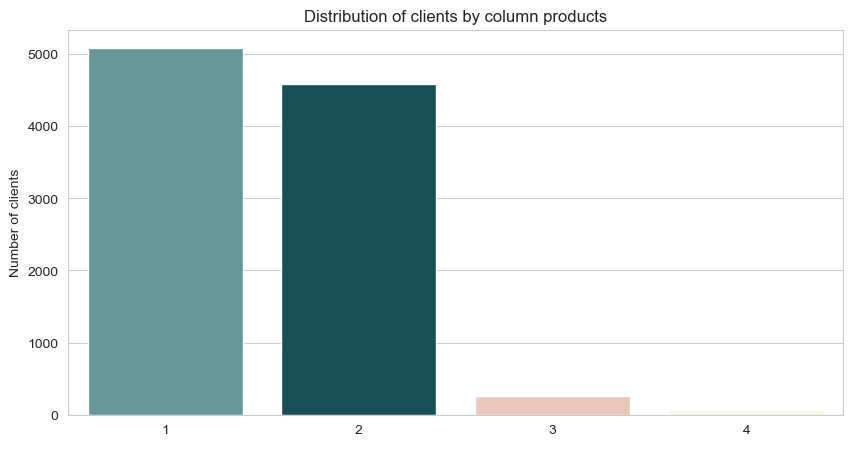

In [36]:
barplots('products')

The most popular number of products used by a client is 1.

A slightly smaller number of clients use 2 products. 

Is amount is enough for everyone, almost no one has 3 or 4 used products. 

### 2.5. Distribution of clients by the presence of a credit card. 

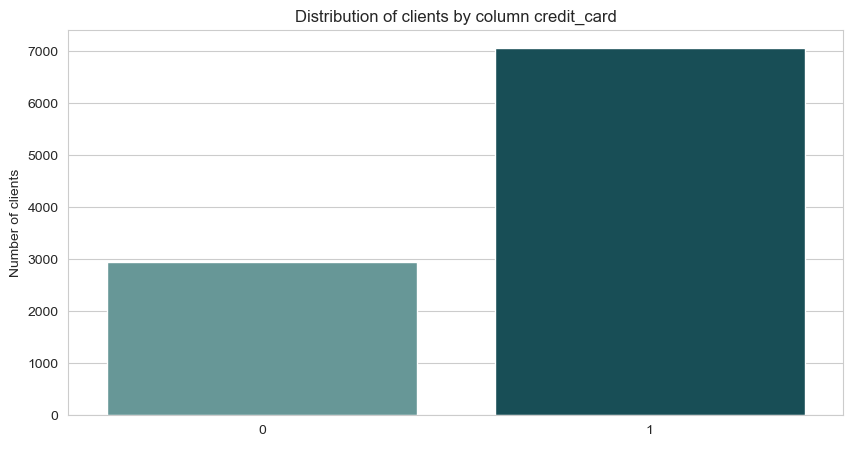

In [37]:
barplots('credit_card')

Most clients have a credit card (70% / 30% share).


### 2.6. Distribution clients by loyalty. 

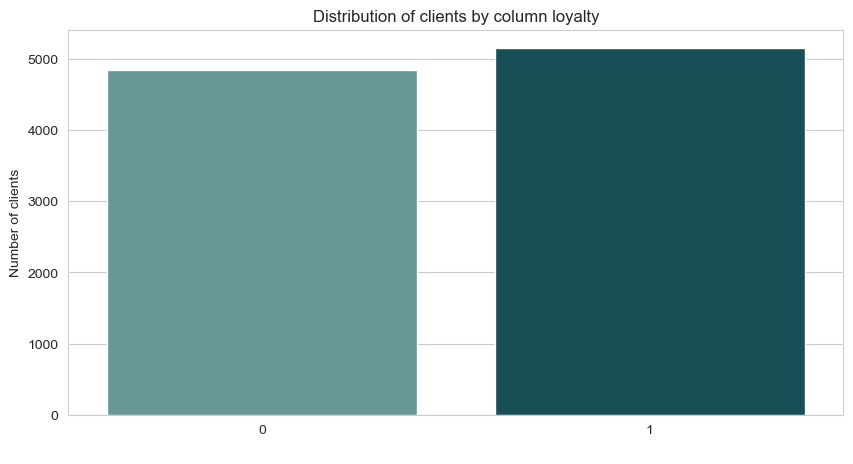

In [38]:
barplots('loyalty')

How this indicator is calculated specifically - we don't know, but the fact that the number of inactive (maybe constant use of services, cards, replenishment of loans, etc) is almost equal to the number of active bank clients. 

### 2.7. Distribution of clients by churn.

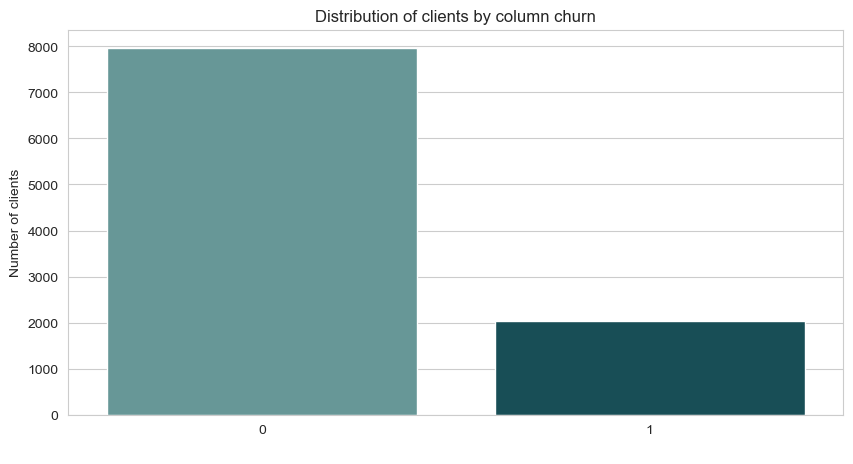

In [39]:
barplots('churn')

80% of clients remained in the bank, and 20% left. 

### 2.8. Distribution of clients by age group. 

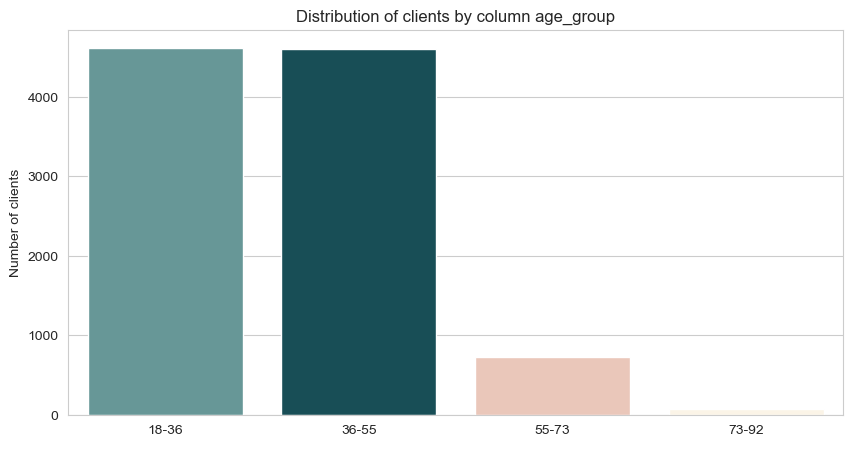

In [40]:
barplots('age_group')

The largest groups of bank clients are: 
1. 18-36 years old
2. 36-55 years old

A very small group of clients of 55-73 years old and very few clients aged 73-92 years old.

### 2.9. Distribution of clients by salary level. 

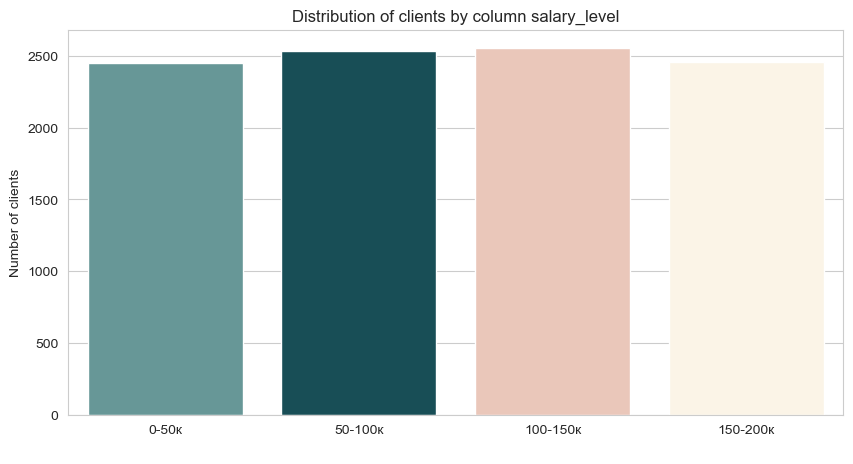

In [41]:
barplots('salary_level')

Salary groups are distributed almost equally, most of the clients recieve 100-150K, then in second place are clients with a salary 50-100K.  

But it is better to look at the distribution of salary in a different format, using a numeric variable and a distribution graph of one quantity. 

### 2.10. Distribution of clients by bank scoring <a class="anchor" id="second10"></a>

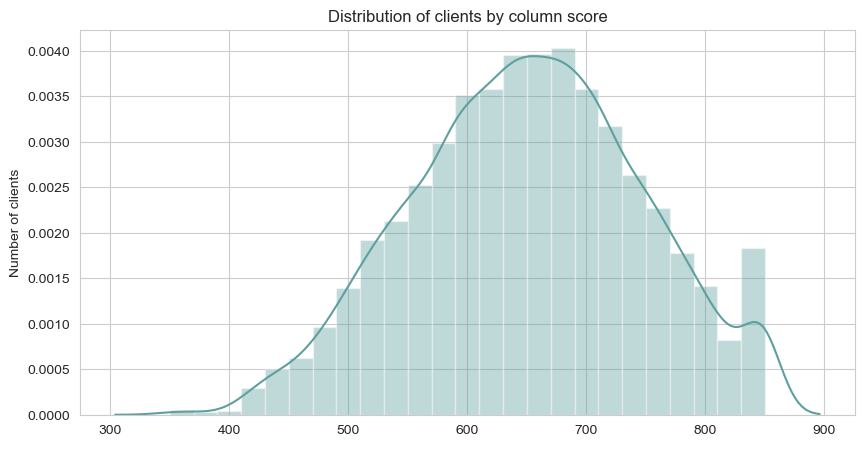

In [42]:
displot('score')

The distribution is normal, but there is some sort of outlier 820, even though our highest value is 850. 
Maybe this is the possible maximum scoring value approved by the bank, issued to clients.

### 2.11. Distribution of clients by age.

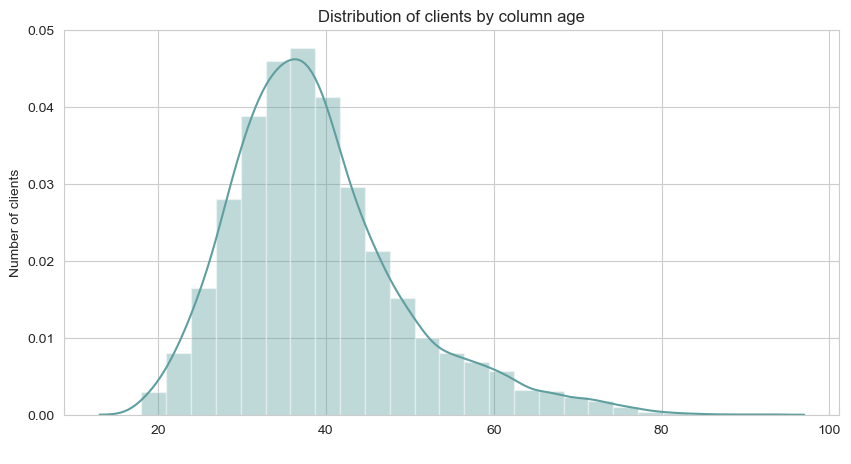

In [43]:
displot('age')

Normal distribution with a peak around 37-39 years and a long right tail (remember about our group 73-92 years old).

On the left side our chart starts at point of 18 years - the age, when you can officially use banking products and open an account. 

### 2.12. Distribution of clients by account balance

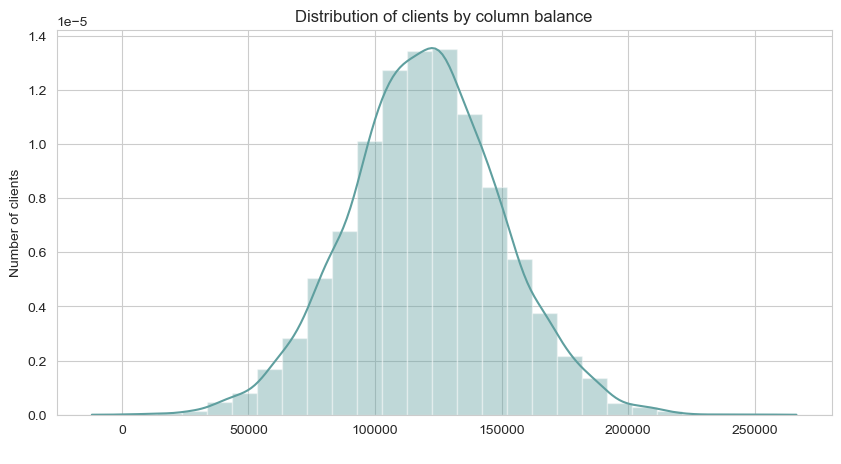

In [44]:
displot('balance')

Ideally even distribution of balance on clients accounts. 

### 2.13. Distribution of clients by salary. 

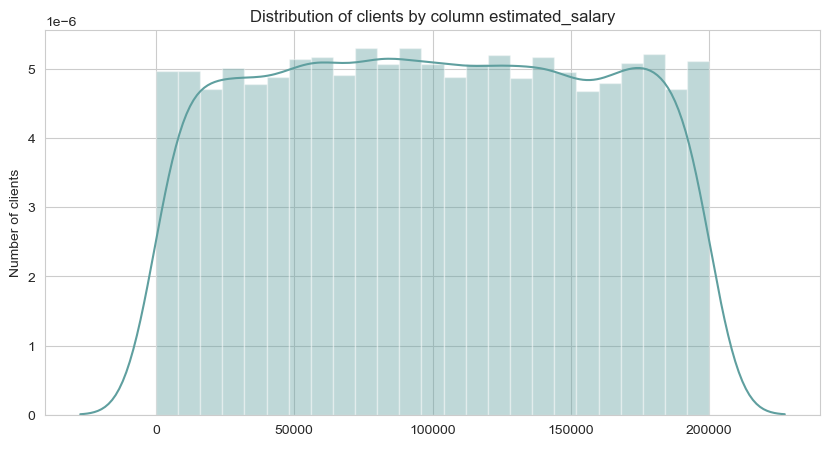

In [45]:
displot('estimated_salary')

We already stress this point before, but the distribution does not look normal, for some reason all the values are approximately at the same levels.

There are a lot of questions about how this indicator is calculated for client for whom this bank is not a salary bank. So it could be filling in some formula.  


### 2.14. Correlation matrix <a class="anchor" id="second14"></a>

Let's construct a heat map based on feateres.

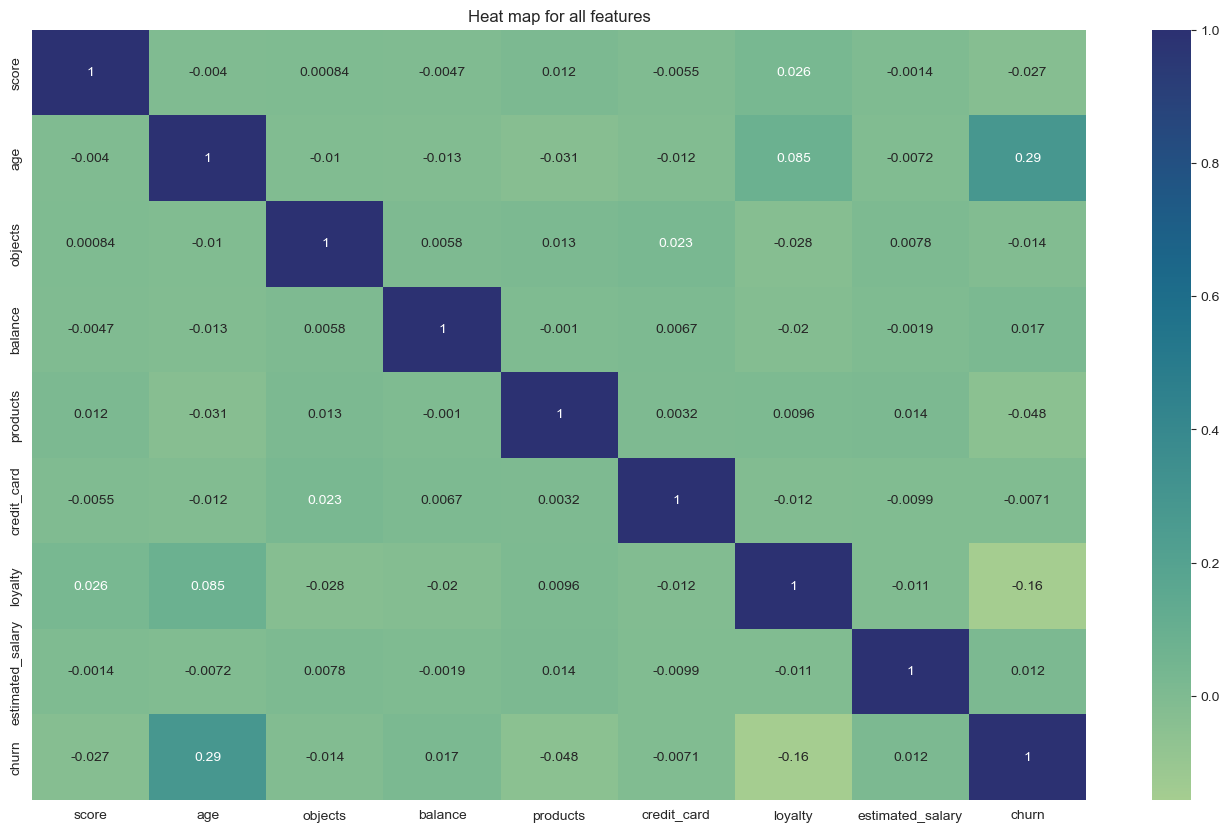

In [46]:
plt.figure(figsize = (17,10))
sea.heatmap(data.drop(['user_id','index'], axis=1).corr(), annot=True, cmap="crest")

plt.title('Heat map for all features')
plt.show()

The highest correlation - 0.29 is seen in the age-churn pair.

We also can pay attention to the age-loyalty pair - 0.085.

But these are all very low correlation coefficients,  that is, the connection is weak.

Now let's take a close look at the churn of clients, what is the portrait of a typical client who refused the services of a bank. 


### 2.15. Churn of clients by city<a class="anchor" id="second15"></a>

In [47]:
#function that construct a pivot table by churn, we will transfer the column to it, by which we will compare
#it is city, gender, objects, products, credit_card, loyalty, churn and new columns - age_group and salary_level

def stacked_bars(column):
    
    new = (data
      .groupby(column)["churn"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack().reset_index())
    new.columns = [column, 'no_churn', 'churn']

    fig, ax = plt.subplots(figsize = (10, 5))

    ax.bar(new[column], new['no_churn'], label='no_churn')
    ax.bar(new[column], new['churn'], label='churn')

    plt.ylabel('Number of clients')
    plt.xlabel(' ')
    plt.title(f'Distribution of clients by column {column}')

    for c in ax.containers:
        labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 10)
    plt.legend(['no churn', 'churn'])
    
    return plt.show()

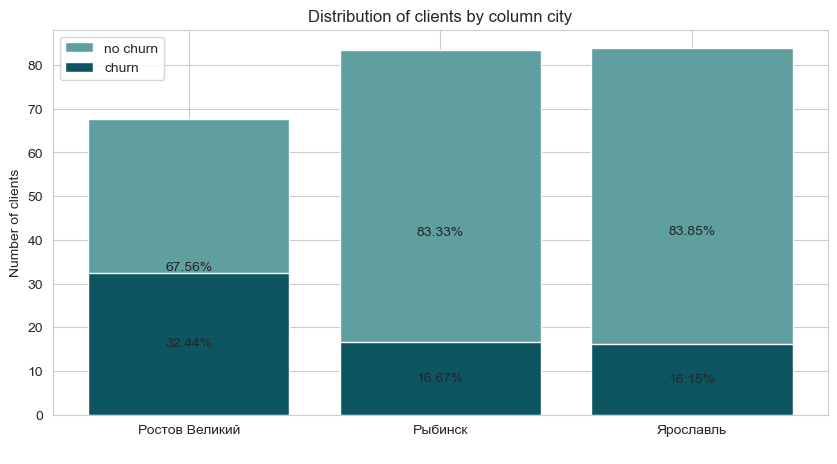

In [48]:
stacked_bars('city')

The biggest churn of clients we have in the city of Rostov the Great - 32%, the cities of Rybinsk and Yaroslavl lose 16% of clients each.  

### 2.16. Churn of clients by gender

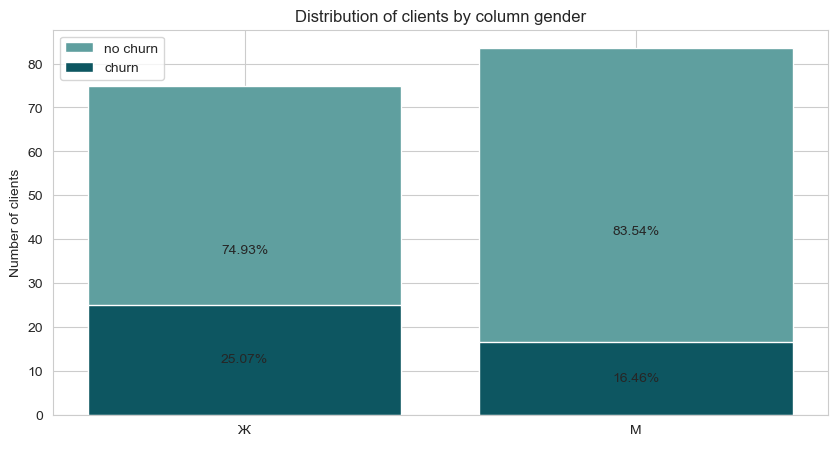

In [49]:
stacked_bars('gender')

25% of churn clients are women. 

### 2.17. Churn of clients by number of products used.

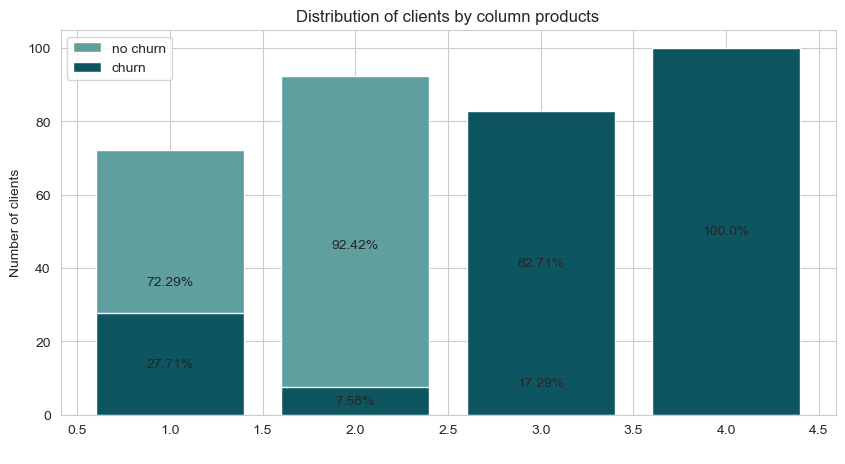

In [50]:
stacked_bars('products')

The most optimal number of product used by client is 3, above and below this - the possibility of churn increase (with 4 products - 100% churn).


### 2.18.  Churn of clients by the number of object used

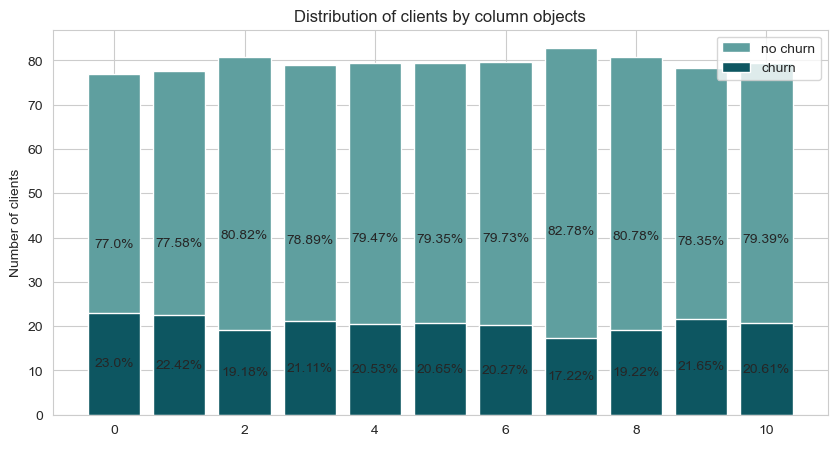

In [51]:
stacked_bars('objects')

The values are to equal and have little impact on clients churn, except for clients who do not own any objects at all - percentage of churn is higher, slightly, but higher. 


### 2.19. Churn of clients by the presence of a credit card. 

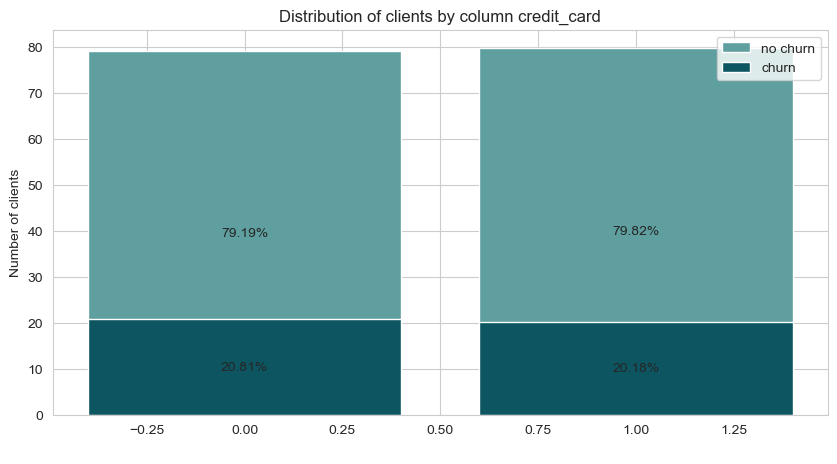

In [52]:
stacked_bars('credit_card')

Having a credit card has no effect on client churn of retention. 

### 2.20. Churn of clients by loyalty.

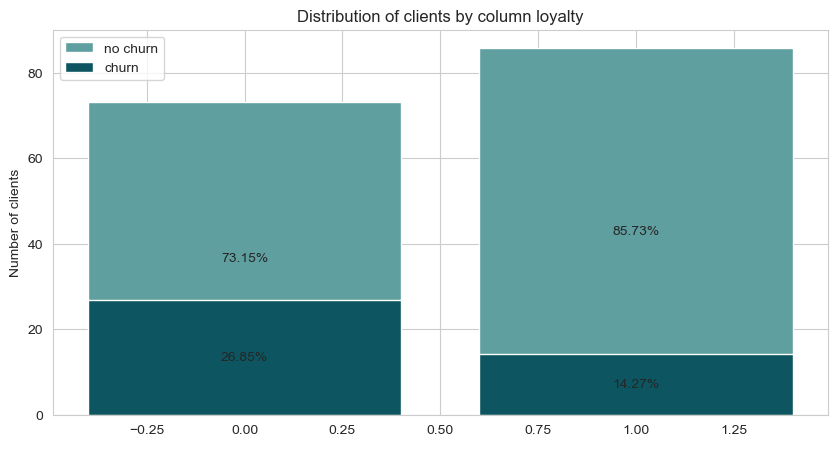

In [53]:
stacked_bars('loyalty')

Loyalty also does not play a special role in clients retention, active ones also leave, but in our dataset the statuses have not yet been updated for these points. 


### 2.21. Churn of clients by age group.

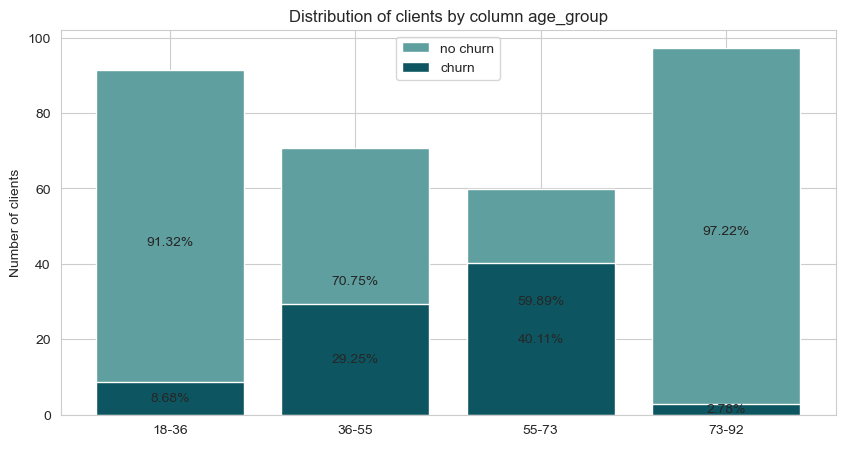

In [54]:
stacked_bars('age_group')

The bank loses most of its clients in the age group of 55-73 years - 40% of the churn. 

We can also pay attention to the group of 36-55 years old, although it is smaller, but the index is still quite impressive - 30% of the churn. 


### 2.22. Churn of clients by salary level.

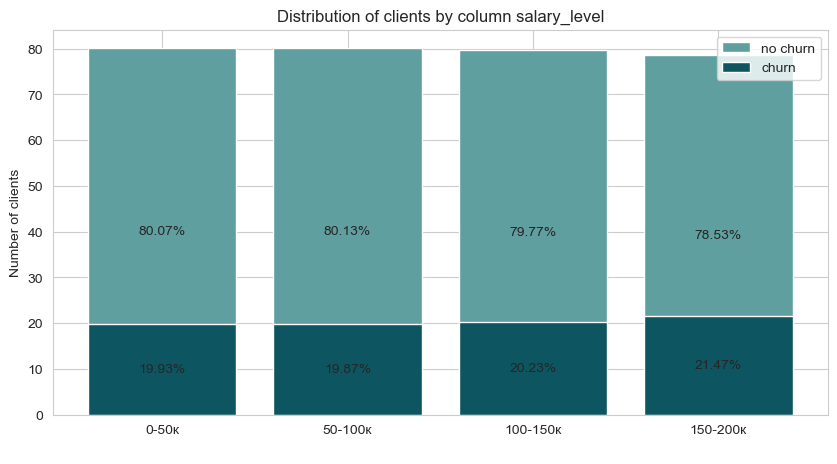

In [55]:
stacked_bars('salary_level')

Since the salaries themselves are not normally distributed, we cannot see the difference here either. 

### 2.23. Churn of clients by score.  <a class="anchor" id="second23"></a>

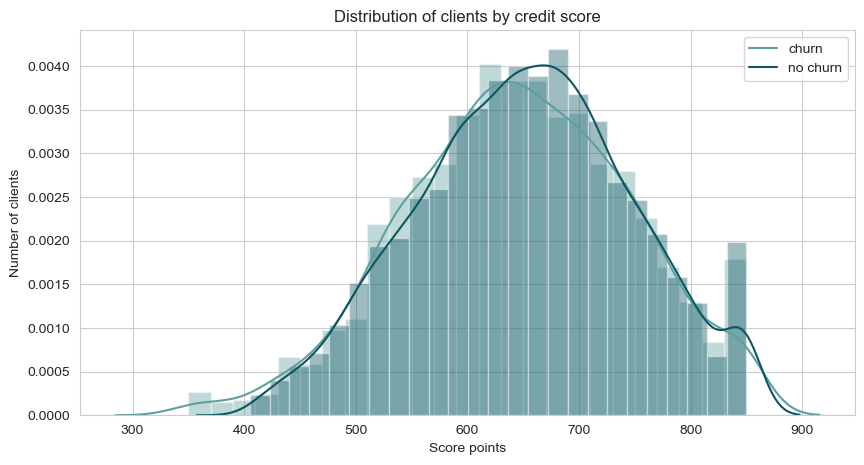

In [56]:
plt.figure(figsize=(10,5))
sea.distplot(data.query('churn == 1')['score'], bins=25) 
sea.distplot(data.query('churn == 0')['score'], bins=25) 

plt.ylabel('Number of clients')
plt.xlabel('Score points') 
plt.title('Distribution of clients by credit score')
plt.legend(labels = ['churn', 'no churn'])

plt.show()

We see a slight shift to the right and up of the entire chart, in case as the client left.

### 2.24. Churn of clients by account balance. 

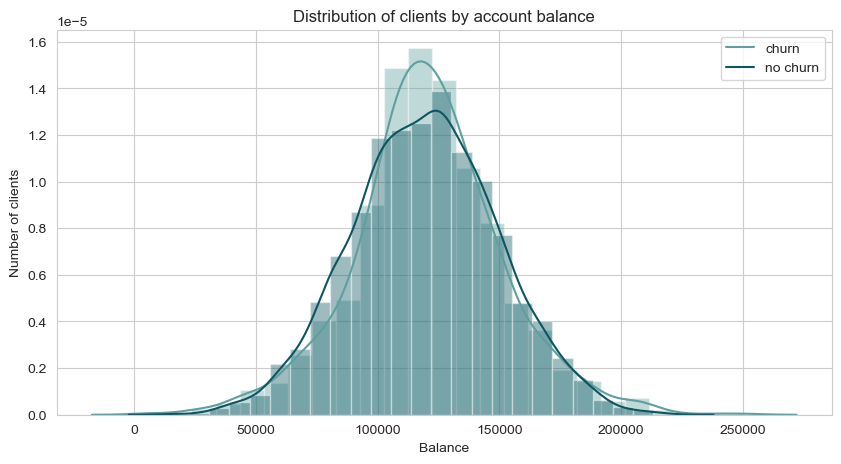

In [57]:
plt.figure(figsize=(10,5))
sea.distplot(data.query('churn == 1')['balance'], bins=25) 
sea.distplot(data.query('churn == 0')['balance'], bins=25) 

plt.ylabel('Number of clients')
plt.xlabel('Balance') 
plt.title('Distribution of clients by account balance')
plt.legend(labels = ['churn', 'no churn'])

plt.show()

Churn clients leave the bank to a greater extent after reaching the mark 100K in the account balance. 

### 2.25 Churn of clients by age.

Although we have already explored age groups before - let's look at the numeric variable of age for the sake of details, especially since it is in this characteristic that we noticed a significant difference. 

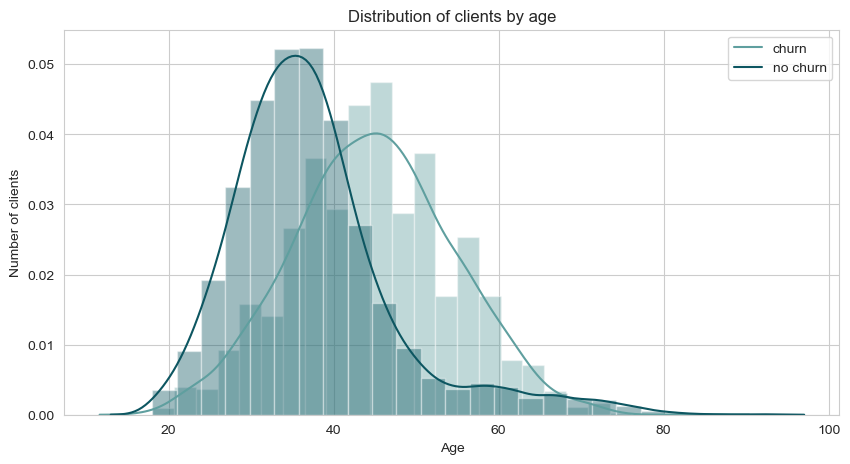

In [58]:
plt.figure(figsize=(10,5))
sea.distplot(data.query('churn == 1')['age'], bins=25) 
sea.distplot(data.query('churn == 0')['age'], bins=25) 

plt.ylabel('Number of clients')
plt.xlabel('Age') 
plt.title('Distribution of clients by age')
plt.legend(labels = ['churn', 'no churn'])


plt.show()

Indeed, it looks even better this way. 

Younger clients remain in the bank, but after 40 years there is a tendency for clients to leave the bank.

### 2.26. EDA conclusions:   <a class="anchor" id="second26"></a>


**General distribution of features:**
* The number of clients in the bank distributed very evenly - 50% in Yaroslavl, the remaining 50% are equally divided by Rybinsk and Rostov the Great.
* There are a thousand more male clients in the bank than female clients (55 / 45)
* 2 objects, 1 object and 7 objects - our top-3 in terms of client distribution. The least number of bank clients who do not have any objects at all and bit more than those who own objects - the maximum number (10).
* The most popular number of products used by a client is 1. A slightly smaller number of clients use 2 products. Is amount is enough for everyone, almost no one has 3 or 4 used products.
* Most clients have a credit card (70% / 30% share).
* 80% of clients remained in the bank, and 20% left.
* The largest groups of bank clients are: 
    1. 18-36 years old;
    2. 36-55 years old;
    3. A very small group of clients of 55-73 years old and very few clients aged 73-92 years old;
    * Peak of clients ages is around 37-39 years, also it has a long right tail up to 92 years.
* Salary groups are distributed almost equally, most of the clients recieve 100-150K, then in second place are clients with a salary 50-100K, but the format of salary values itself does not look normal,  for some reason all the values are approximately at the same levels. So it could be filling in some formula. 
* The distribution of scoring is normal, but there is some sort of outlier 820, even though our highest value is 850. Maybe this is the possible maximum scoring value approved by the bank, issued to clients.


We also constructed a **correlation matrix** of features, but these are all very low correlation coefficients, that is, the connection is weak (less then 30%), the highest correlation - 0.29 is seen in the age-churn pair. We also can pay attention to the age-loyalty pair - 0.085.



**Distribution of features by clients churn:**

* The biggest churn of clients we have in the city of Rostov the Great - 32%, the cities of Rybinsk and Yaroslavl lose 16% of clients each.
* 25% of churn clients are women (mens - only 16%) 
* The most optimal number of product used by client is 3, above and below this - the possibility of churn increase (with 4 products - 100% churn).
* Having a credit card has no effect on client churn of retention.
* Younger clients remain in the bank, but after 40 years there is a tendency for clients to leave the bank.
    - The bank loses most of its clients in the age group of 55-73 years - 40% of the churn. 
    - We can also pay attention to the group of 36-55 years old, although it is smaller, but the index is still quite impressive - 30% of the churn.
* Churn clients leave the bank to a greater extent after reaching the mark 100K in the account balance.



**Summarizing:**

Most likely, such a client will leave the bank: 
* female 
* over 40 years old
* living in Rostov
* with a lot of used products
* with a balance of more than 100K

## 3. Segmentation  <a class="anchor" id="third"></a>

### 3.1. Segmentation of users based on data on the number of products consumed <a class="anchor" id="third1"></a>
We have 4 products in total. 

From paragraph 2.4. we remember, that the most popular number of products used by a client is 1 (more that a half of all bank clients).  
Slightly fewer clients use 2 products. 

This amount is enough for everyone, almost no one has 3 or 4 used products. 

We also remember from paragraph 2.17 - the most optimal number of products used by a client is 2 (with this number the churn from the bank - less than 8%), above and below this - the percantage of churn increases (with 4 products - 100% churn).

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products, dtype: float64

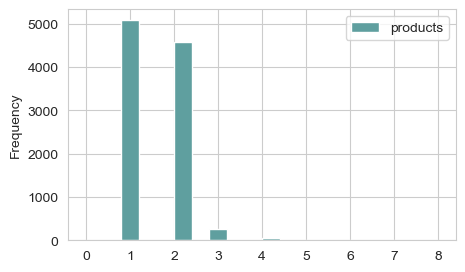

In [59]:
data.plot(y= "products", kind= "hist", bins= 20, grid= True, figsize= (5,3), range= (0,8))
data["products"].describe()

In [60]:
#edit the barplots function, now it will draw barplots by segments and place them next to each other 
#automatically go through the indexes - for drawning, and through values - the number of products
#it is city, gender, objects, products, credit_card, loyalty, churn and new columns - age_group and salary_level

def subplots(column):
    products_amount = [1, 2, 3, 4]
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(21,6))
    fig.suptitle(f'Distribution of segmented clients by column {column}')
    for i, val in enumerate(products_amount):
        
        sea.barplot(ax=axes[i], data=data.query('products == @val').
                      groupby(column)['index'].count().reset_index().
                      sort_values('index', ascending=False),
                x=column, 
                y='index')
        axes[i].set_title(f'Number of product used - {val}')
        axes[i].set_xlabel(column),
        axes[i].set_ylabel('Number of clients')
        
        
    return plt.show()

In [61]:
#the function that will draw subplots by numeric features is rewritten by analogy with a function above
#for columns score, age, balance and estimated_salary


def subdisplot(column):
    products_amount = [1, 2, 3, 4]
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(21,6))
    fig.suptitle(f'Distribution of segmented clients by column {column}')
    for i, val in enumerate(products_amount):
        
        sea.distplot(data.query('products == @val')[column], bins=25, ax=axes[i])
        axes[i].set_ylabel('Number of clients')
        axes[i].set_xlabel(column),
        axes[i].set_title(f'Number of product used - {val}')
        
    return plt.show()

### 3.2. Distribution of client segments by cities. <a class="anchor" id="third2"></a>

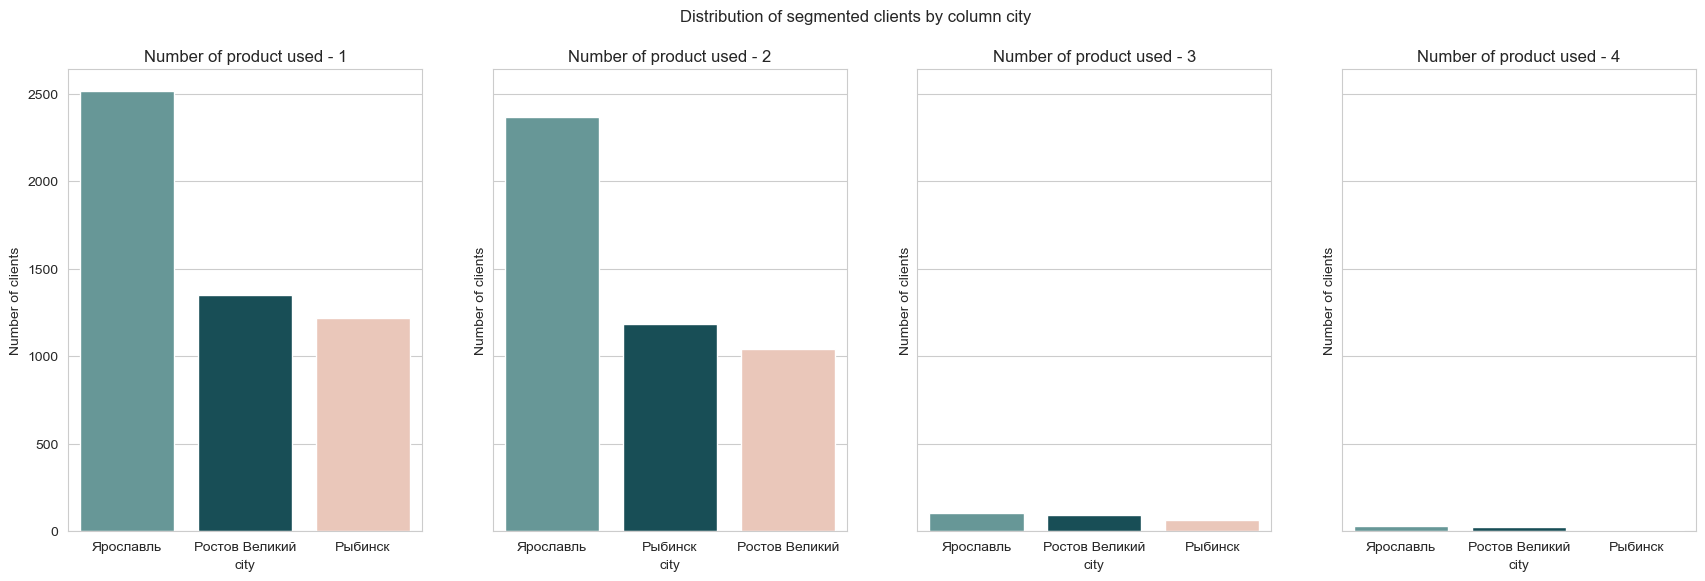

In [62]:
subplots('city')

The distribution of segmented clients by city is similar to the overall picture: half of all in Yaroslavl, and 25% each in Rostov and Rybinsk (Rybinsk is a couple of hundred clients behind). We also see that almost no one uses 3, and  especially 4 products. 

### 3.3. Distribution of client segments by gender.

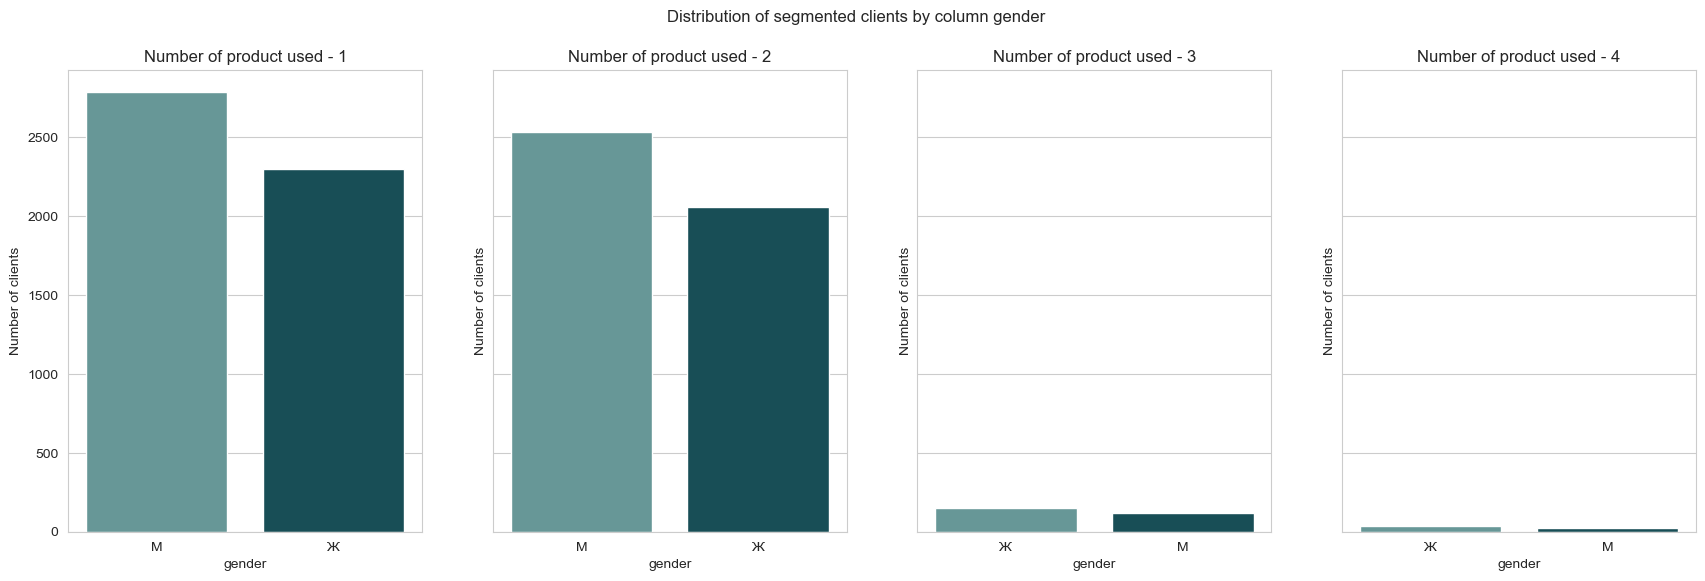

In [63]:
subplots('gender')

In segments with 1 and 2 used products, the picture is similar, men are in the lead, women are slightly behind.

But in the segments of 3 and 4 products, women are in the lead, although there are still almost no clients  there.

### 3.4. Distribution of client segments by objects.

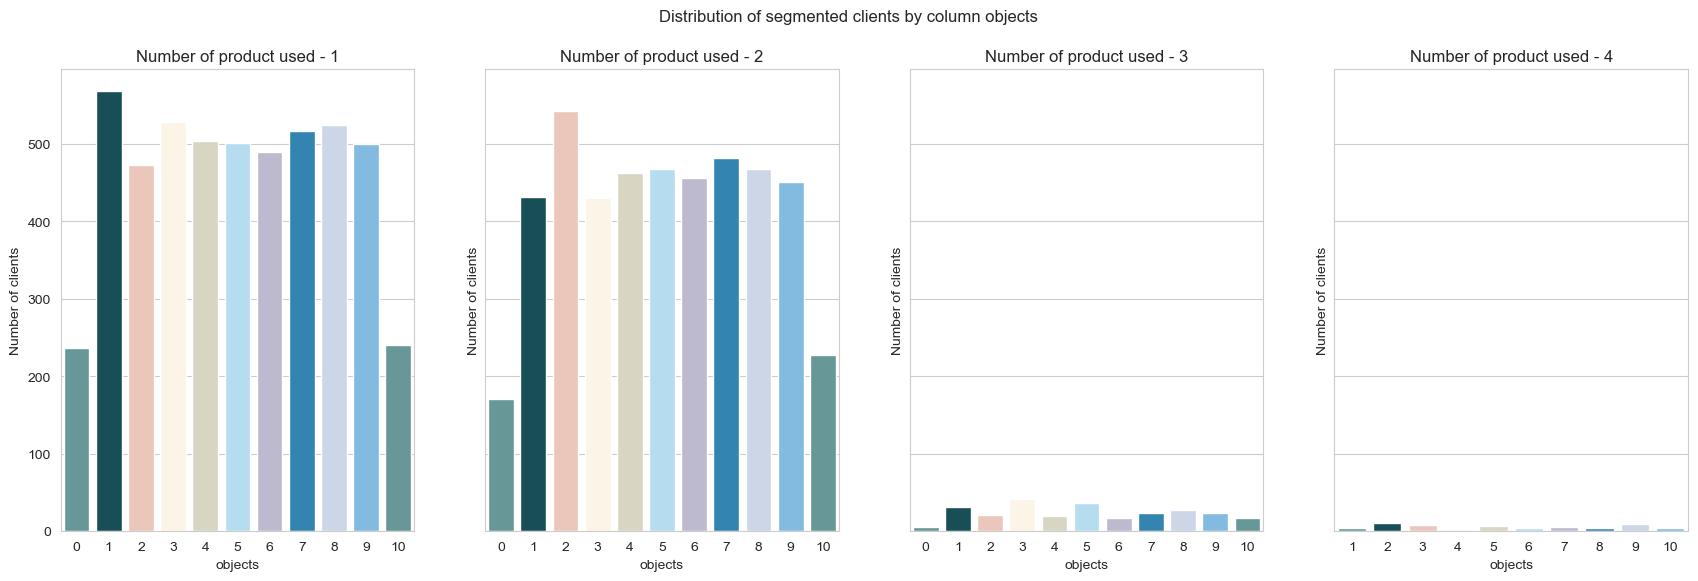

In [64]:
subplots('objects')

For clients who use 1 product, it is logical that one object is owned. 

Clients who use 2 products - most own 2 objects. 

Owned objects - can be products of the same type. 

### 3.5. Distribution of client segments by credit card.

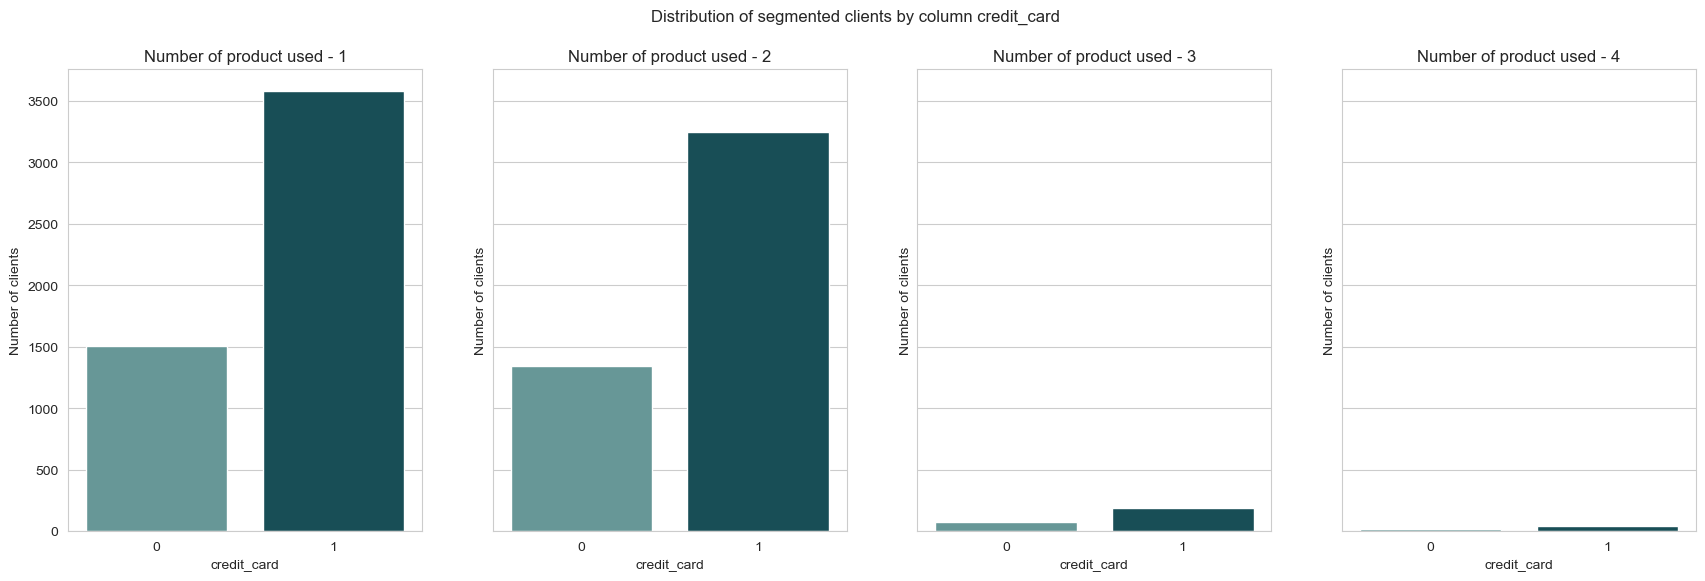

In [65]:
subplots('credit_card')

Most clients have a credit card with 1 and 2 products. 

It looks like the bank is very good at issuing credit cards, because even client with 1 product - a credit card is also the vast majority of clients. 

### 3.6. Distribution of client segments by loyalty.

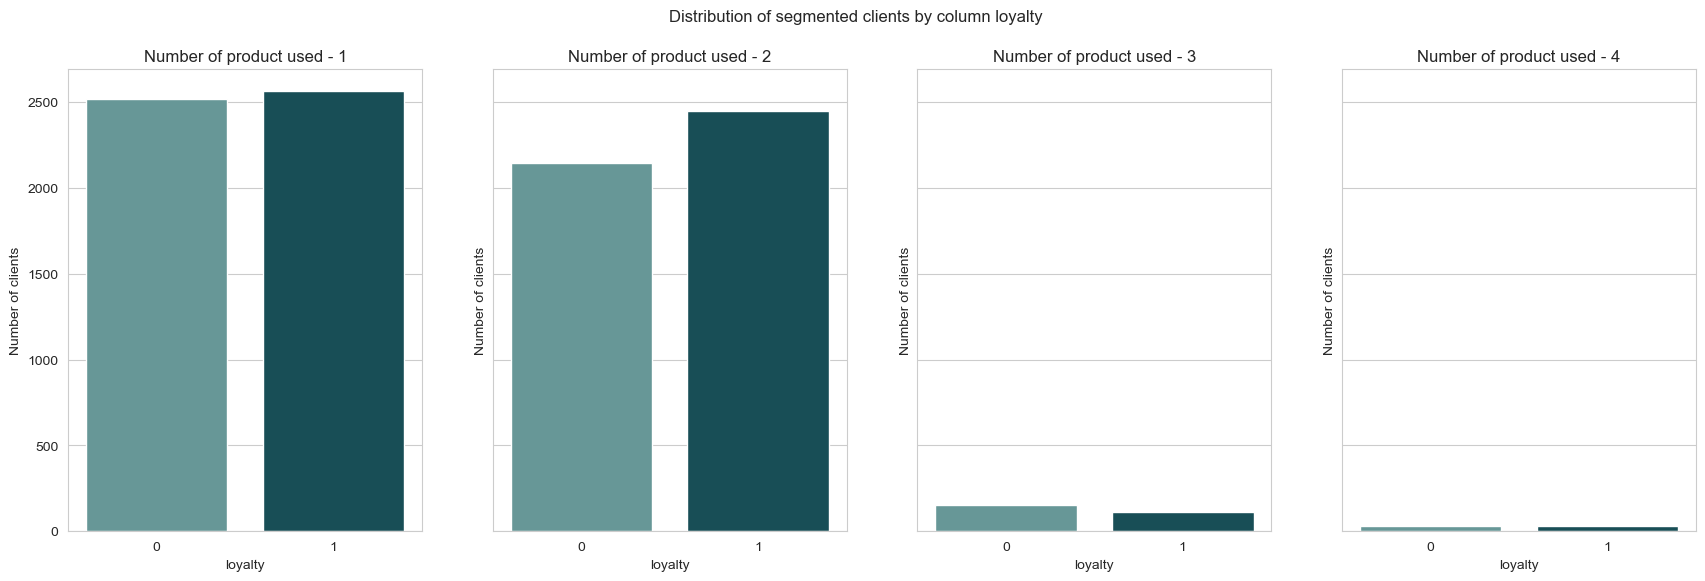

In [66]:
subplots('loyalty')

The graphs are similar to what we saw at the beggining of EDA, but here we see that the difference between active and and inactive clients is greater with 2 product used. 

And with 3 and 4 products, the not-loyalty is higher than the loyalty. 

### 3.7. Distribution of client segments by churn.

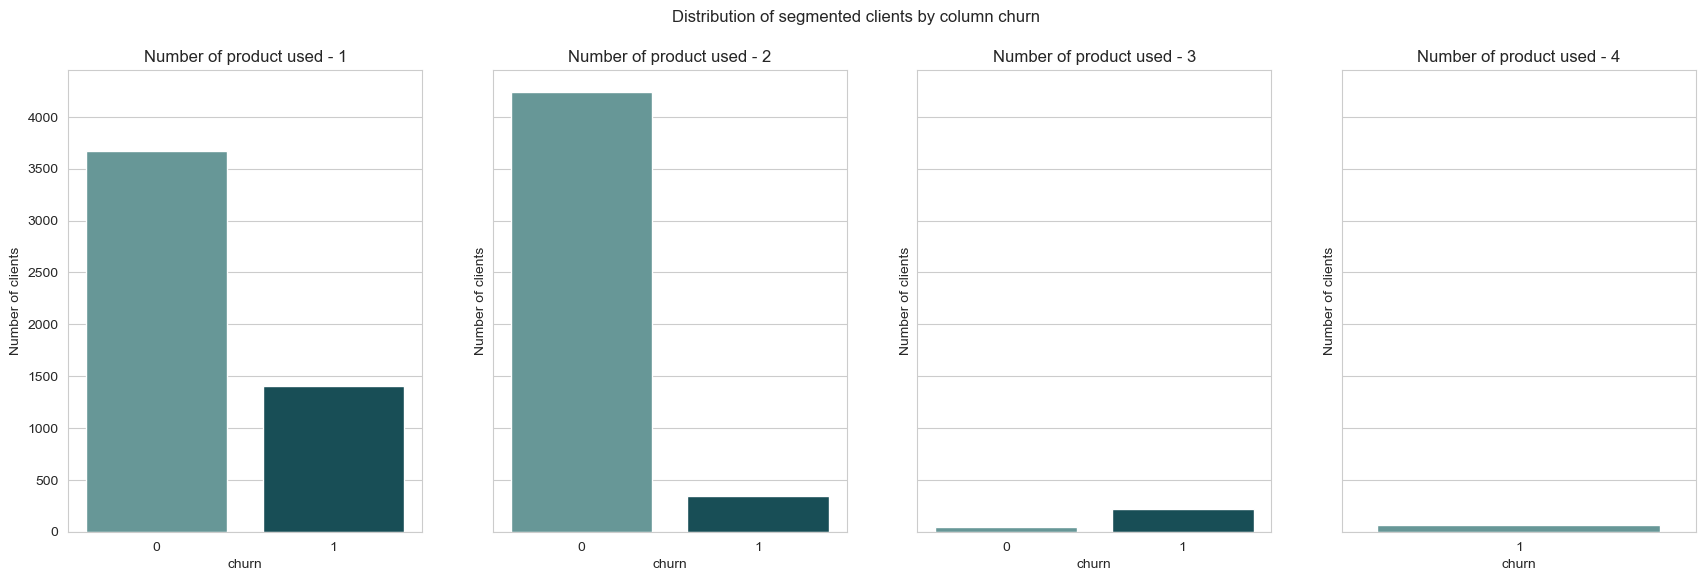

In [67]:
subplots('churn')

The churn of clients with 1 product is much higher than the rest of the segments. 

Those with 2 products will stay in the bank more.

### 3.8. Distribution of client segments by age group.

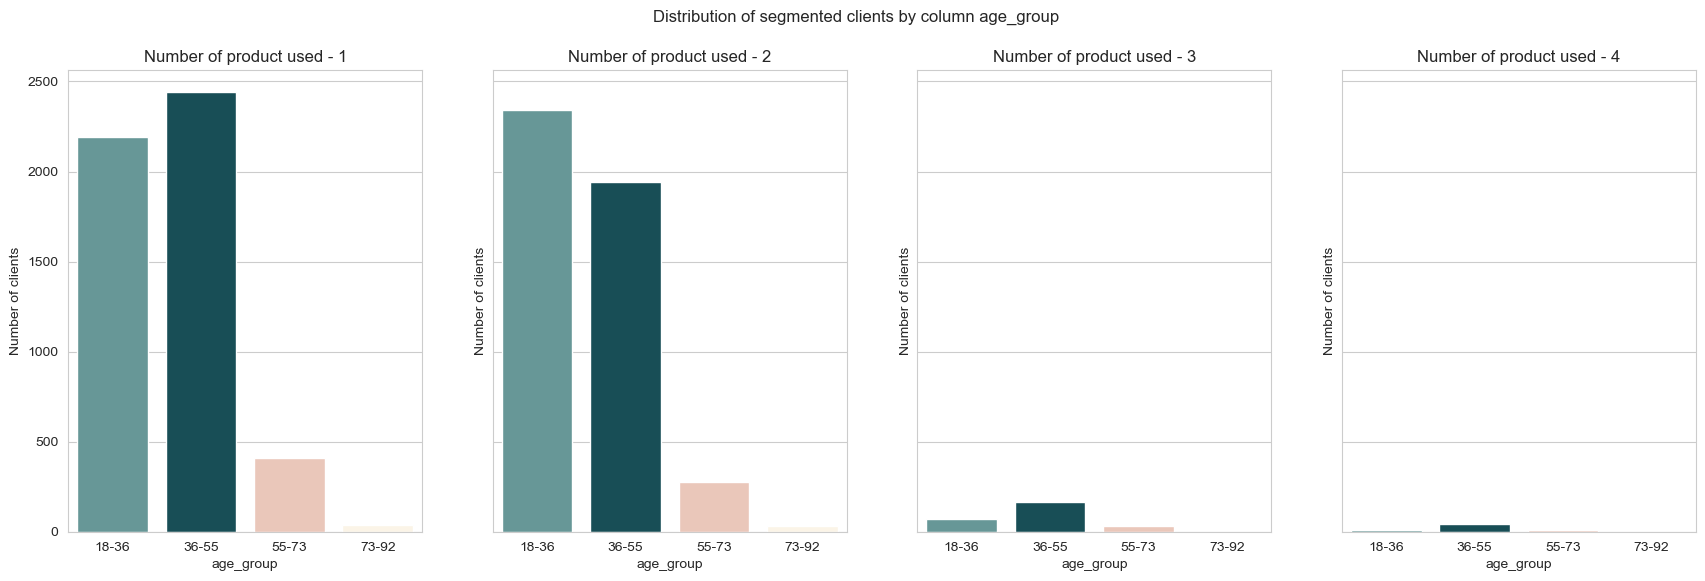

In [68]:
subplots('age_group')

The 1 product is used mainly in the group of 36-55 years old. 

But 2 products are already more popular in the younger group - 18-36 years old. 

Group 56-73 appears only in the 1 and 2 segment, and the group 18-36 is almost not represented in the segment of 4 products.

### 3.9. Distribution of client segments by salary level.

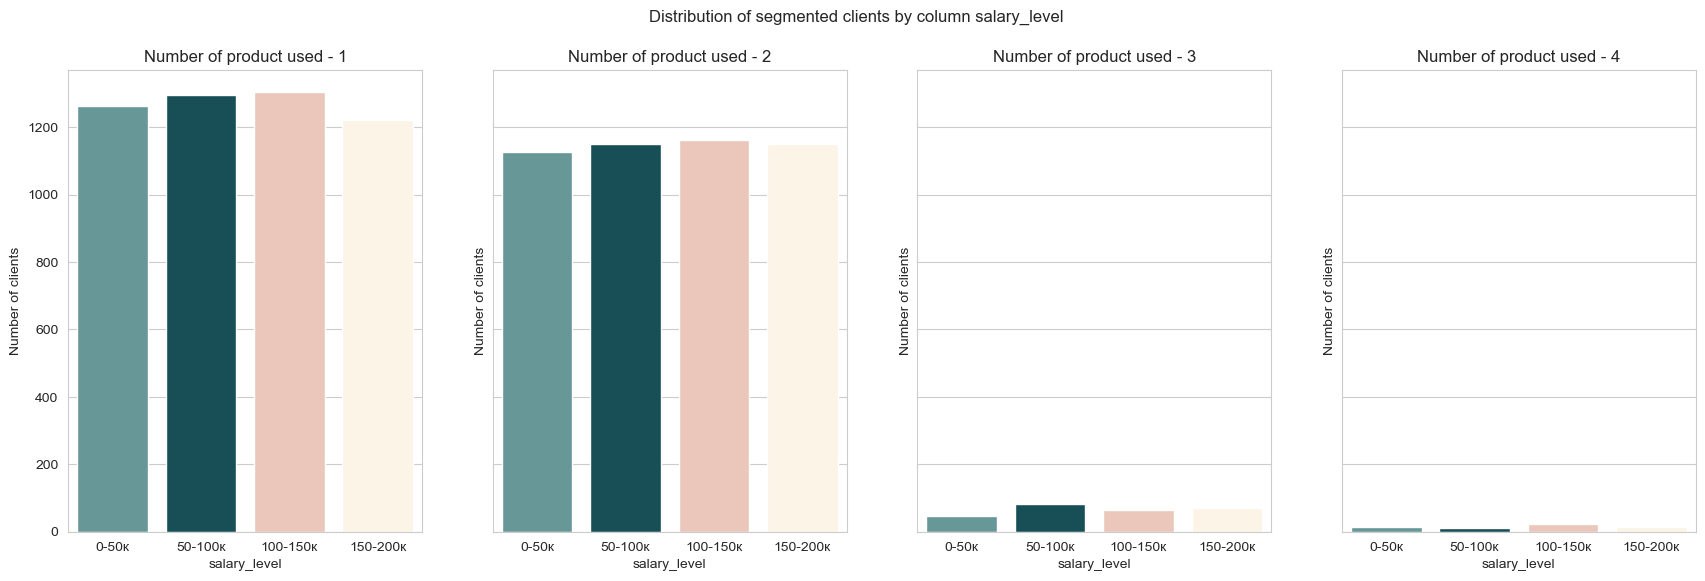

In [69]:
subplots('salary_level')

The difference in salary level is small, only the group of clients with a salary level 150-200K uses 2 or 3 products more than the rest of the groups. 

### 3.10. Distribution of client segments by bank score. <a class="anchor" id="third10"></a>

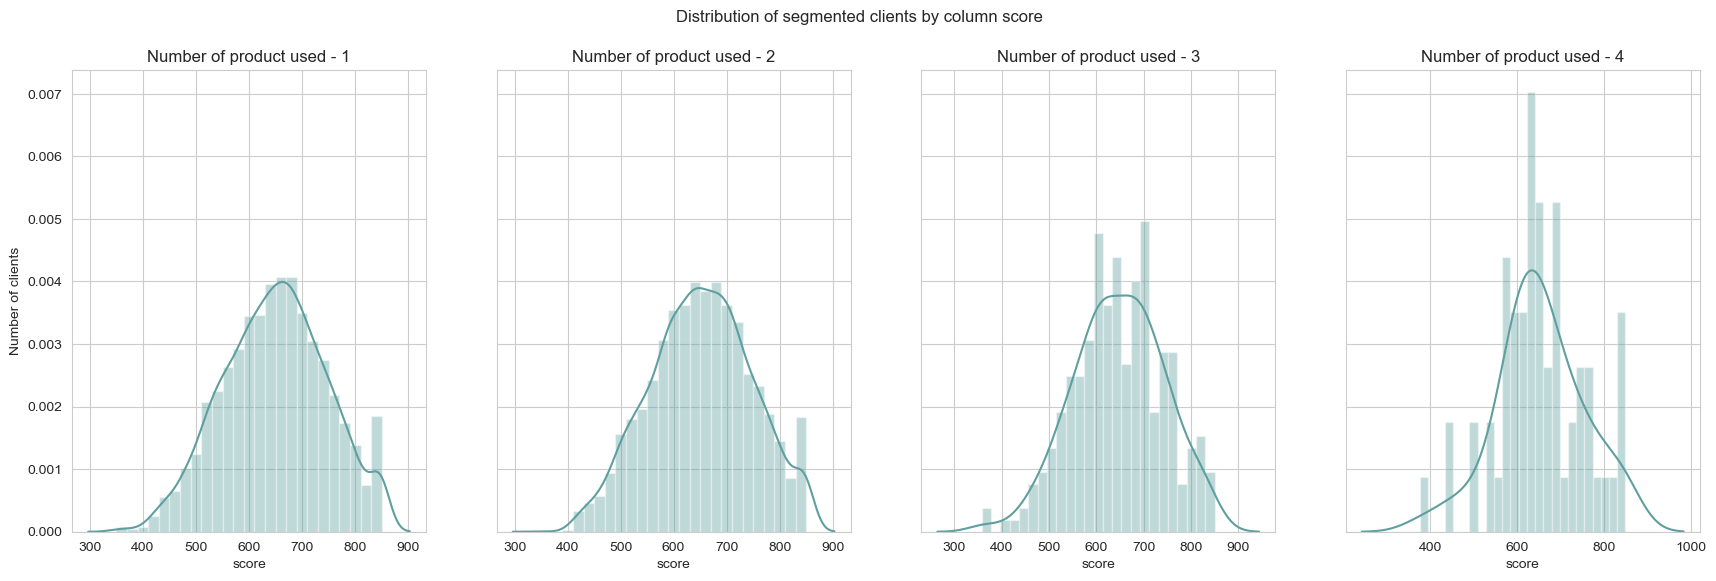

In [70]:
subdisplot('score')

Segment with 1 and 2 used products are very similar to the overall distribution plot with an outlier around 820. 

In segments with 3 and 4 products, there is too little data, so there are such scatter. 

### 3.11. Distribution of client segments by age.

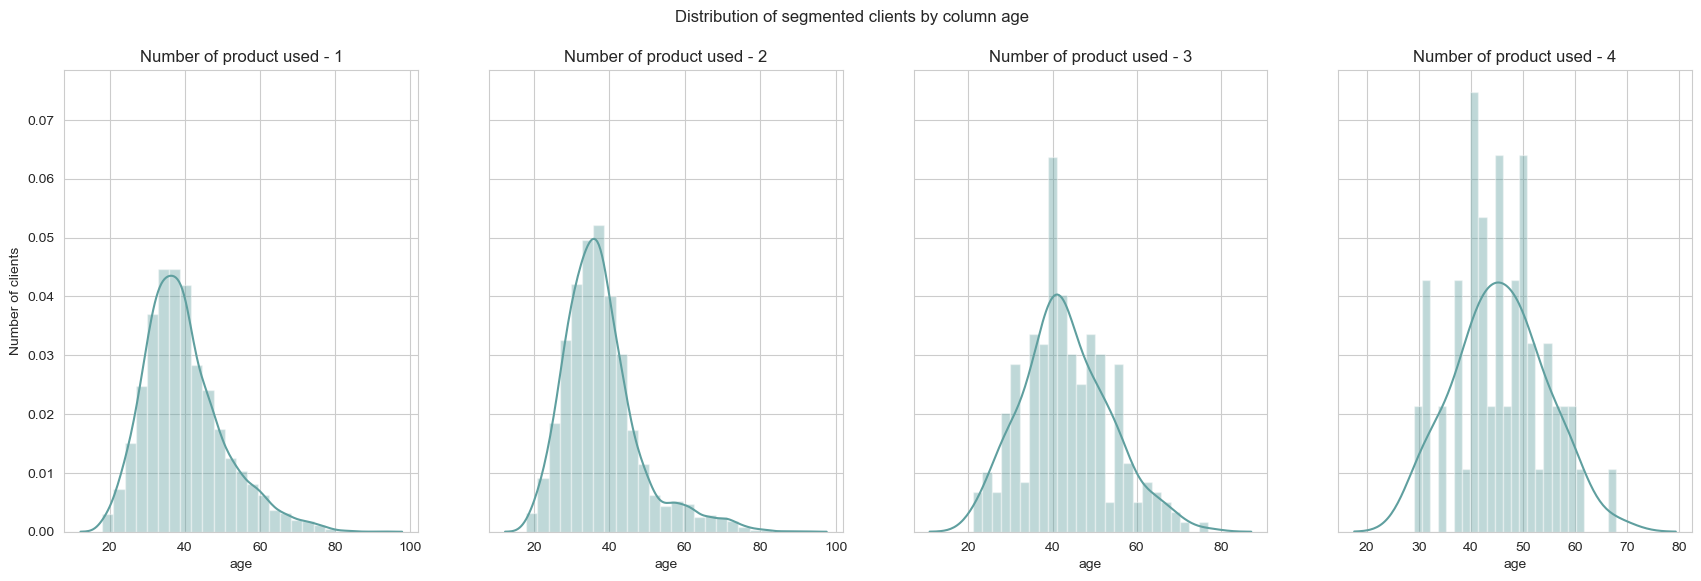

In [71]:
subdisplot('age')

Again, due the small number of clients in the segments of 3 and 4 products - the data is very scatter. 

But the segments with 1 and 2 products - in the segment of 2 products, the graph is higher and narrower, the concentration of ages of about 39 years is denser. 

### 3.12. Distribution of client segments by account balance.

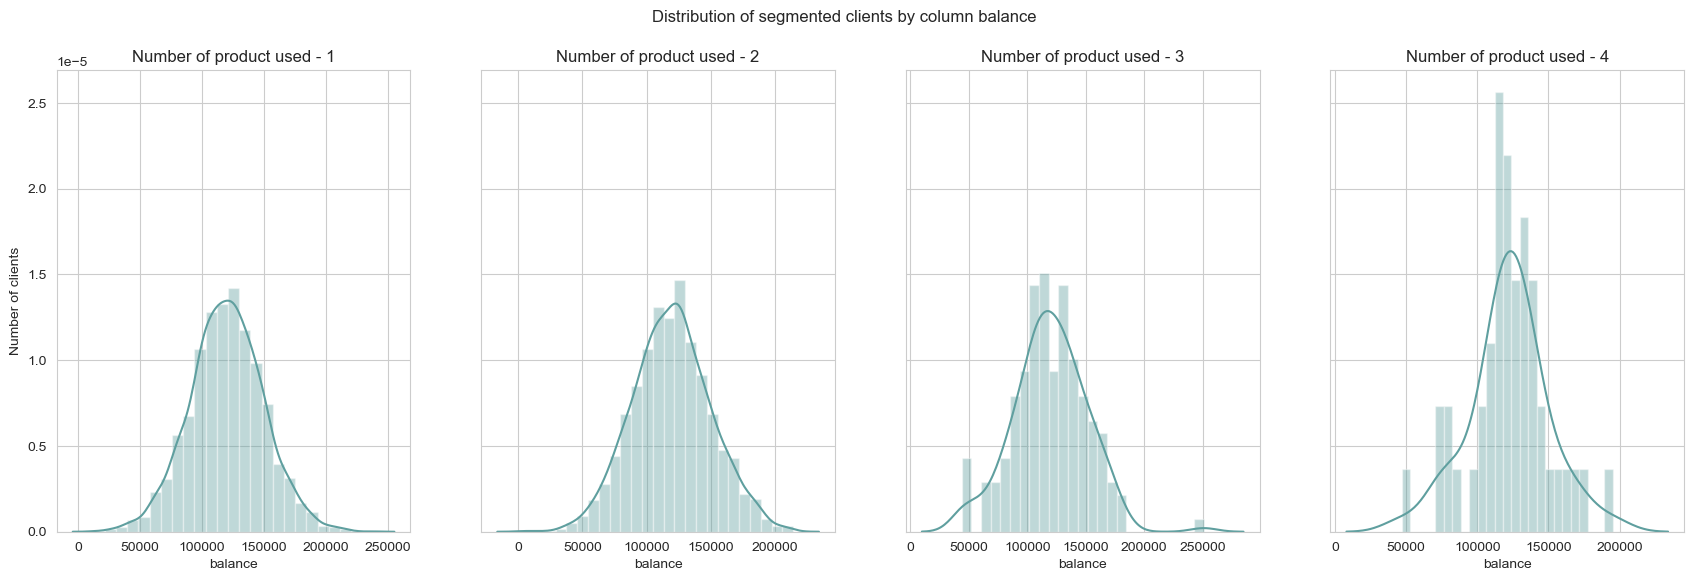

In [72]:
subdisplot('balance')

The distribution from the first three segments are similar to each other and to the overall distribution of clients. Only segment with 3 and 4 products still have more outliers. 

### 3.13. Distribution of client segments by salary.

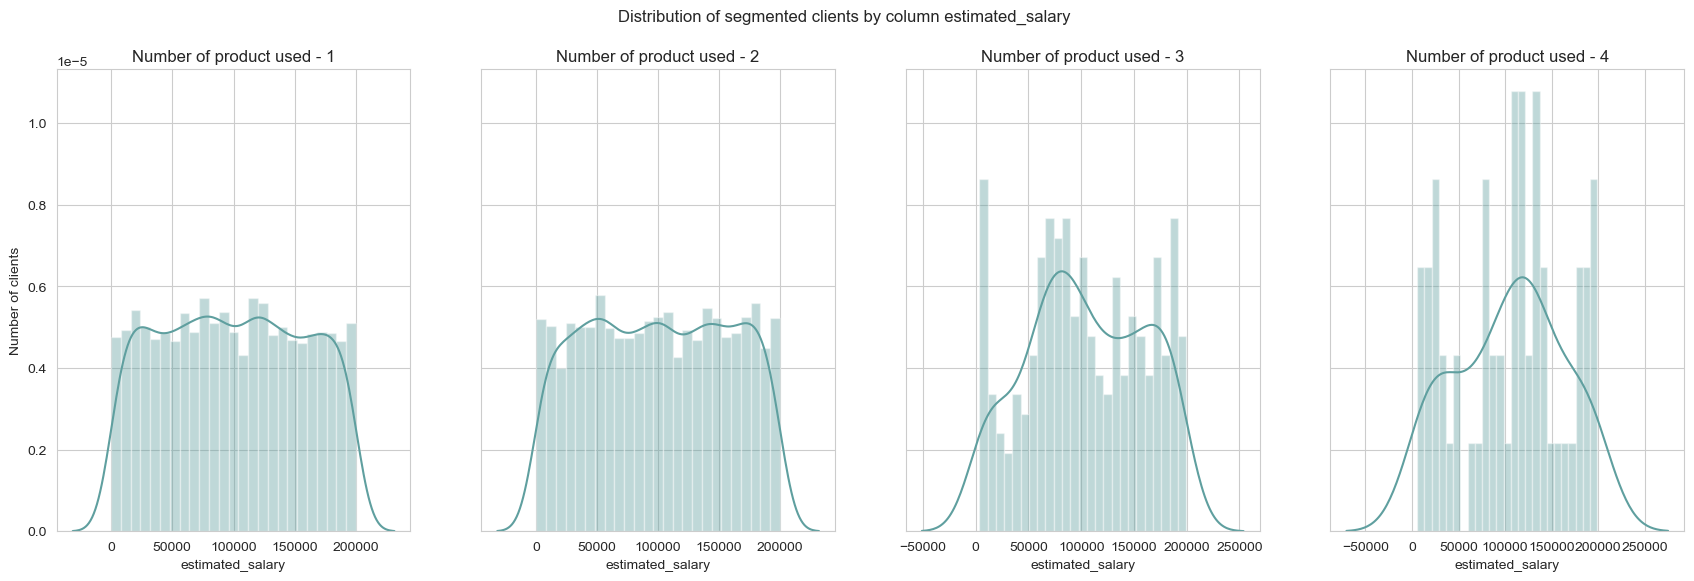

In [73]:
subdisplot('estimated_salary')

Due to the fact that the column with the values of salaries does not represent a valid and accurate information, but rather a kind of homogeneous mass. 

### 3.14. Segmentation conclusions<a class="anchor" id="third14"></a>

We have 4 products in total.

From paragraph 2.4. we remember, that the most popular number of products used by a client is 1 (more that a half of all bank clients).
Slightly fewer clients use 2 products.

This amount is enough for everyone, almost no one has 3 or 4 used products.

We also remember from paragraph 2.17 - the most optimal number of products used by a client is 2 (with this number the churn from the bank - less than 8%), above and below this - the percantage of churn increases (with 4 products - 100% churn).

**General distribution of features by client segments**

* The distribution of segmented clients by city is similar to the overall picture: half of all in Yaroslavl, and 25% each in Rostov and Rybinsk (Rybinsk is a couple of hundred clients behind). We also see that almost no one uses 3, and  especially 4 products. 

* In segments with 1 and 2 used products, the picture is similar, men are in the lead, women are slightly behind. But in the segments of 3 and 4 products, women are in the lead, although there are still almost no clients there.

* For clients who use 1 product, it is logical that one object is owned. Clients who use 2 products - most own 2 objects. *Owned objects - can be products of the same type.*

* Most clients have a credit card with 1 and 2 products. It looks like the bank is very good at issuing credit cards, because even client with 1 product - a credit card is also the vast majority of clients.

* The difference between active and and inactive clients is greater with 2 product used. And with 3 and 4 products, the not-loyalty is higher than the loyalty.

* The churn of clients with 1 product is much higher than the rest of the segments. Those with 2 products will stay in the bank more.

* The 1 product is used mainly in the group of 36-55 years old. But 2 products are already more popular in the younger group - 18-36 years old. Group 56-73 appears only in the 1 and 2 segment, and the group 18-36 is almost not represented in the segment of 4 products.

* The difference in salary level is small, only the group of clients with a salary level 150-200K uses 2 or 3 products more than the rest of the groups.

**Summarizing:**

*Client segment that uses 1 product:*
* more likely to leave the bank
* men
* 36-55 years old
* rather 1 object  
* more likely to have a credit card  
* salary 50к-150к

*Client segment that uses 2 products:*
* lower probability of leaving the bank
* men
* 18-35 years old
* rather 2 objects
* more actibe in the bank
* salary 100к-200к


## 4. Hypothesis testing <a class="anchor" id="fourth"></a>

We will leave only segments with 1 and 2 products in use. 

### 4.1. Formulation of statistical hypotheses - client income.  <a class="anchor" id="fourth1"></a>

In [74]:
#check the number of rows in each segment
segment_pivot = data.query('products == 1 or products == 2').pivot_table(
    index= "products", values= "user_id", aggfunc= ["count"]).reset_index()
segment_pivot.columns = ["segment", "count"]
segment_pivot

segment  count
0        1   5084
1        2   4590

* Number of rows in the segment 1: 5084
* Number of rows in the segment 2: 4590

In [75]:
#check the average and the mead by segments
mean_median = data.query('products == 1 or products == 2').pivot_table(
    index= 'products', values= 'estimated_salary', aggfunc= ['mean', 'median'])
mean_median.columns = ["mean", "median"]
mean_median

mean      median
products                           
1          99487.256851   99226.830
2         100452.012821  100738.855

In [76]:
data1 = data.query('products == 1')['estimated_salary']
data2 = data.query('products == 2')['estimated_salary']

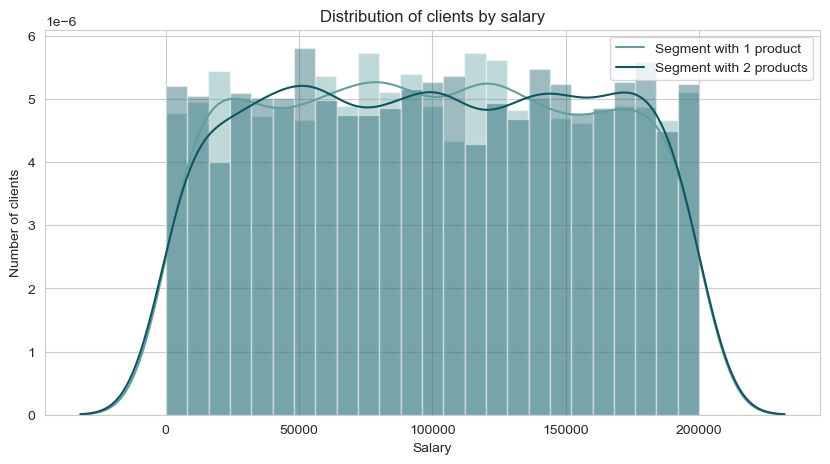

In [77]:
plt.figure(figsize=(10,5))
sea.distplot(data1, bins=25) 
sea.distplot(data2, bins=25) 

plt.ylabel('Number of clients')
plt.xlabel('Salary') 
plt.title('Distribution of clients by salary')
plt.legend(labels = ['Segment with 1 product', 'Segment with 2 products'])

plt.show()

We will consider the difference between segments of clients who use 1 product of the bank and the segment of clients who use 2 products of the bank. 

Since the distribution in the `estimated salary` column is not normal, we will use Mann-Whitney test for our hypothesis. 


Let's formulate hypotheses: 
* Н0 - there is no statistically significant difference between salaries in the segments, the salaries of clients in these two segments do not differ
* Н1 - there is statistically significant difference between salaries in the segments, the salaries of clients in these two segments differ

### 4.2. Testing statistical hypotheses - difference between segment incomes. <a class="anchor" id="fourth2"></a>

In [78]:
alpha = 0.05  #critical level of statistical significance

results = st.mannwhitneyu(data1, data2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: the difference is statistically significant')
else:
    print(
        'We failed to reject the null hypothesis, no difference can be drawn'
    ) 

p-value:  0.4079566651927651
We failed to reject the null hypothesis, no difference can be drawn


The p-value we got is much higher than our significant level of 5%, no statistically significant difference was found between salaries of clients in two segments, so we reject the alternative hypothesis. 


### 4.3. Formulation of statistical hypotheses - client churn. <a class="anchor" id="fourth3"></a>

But I would also like to check our segments for the churn. Remember, how the churn ratio by segments looked like:

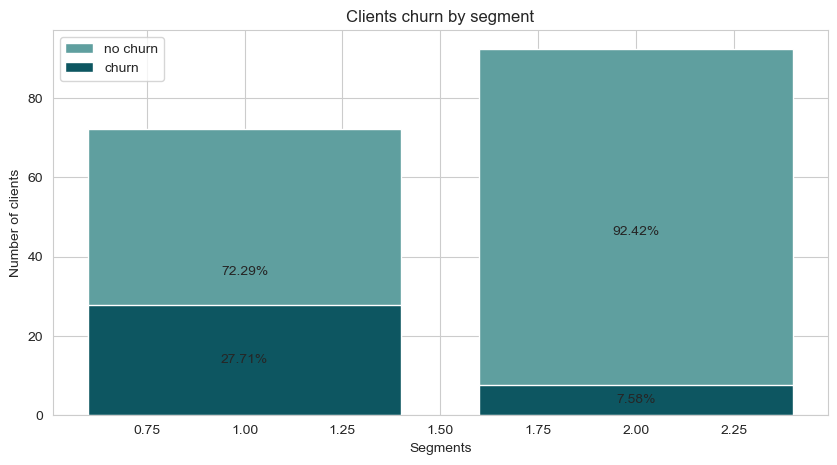

In [79]:
new_segments = (data.query('products == 1 or products == 2')
      .groupby('products')["churn"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack().reset_index())
new_segments.columns = ['products', 'no_churn', 'churn']

fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(new_segments['products'], new_segments['no_churn'], label='no_churn')
ax.bar(new_segments['products'], new_segments['churn'], label='churn')

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 10)
plt.legend(['no churn', 'churn'])

plt.ylabel('Number of clients')
plt.xlabel('Segments')
plt.title('Clients churn by segment')
plt.show()

In [80]:
segment1_pivot = data.query('products == 1').pivot_table(
    index= "churn", values= "user_id", aggfunc= ["count"]).reset_index()
segment1_pivot.columns = ["churn", "count"]
segment1_pivot

churn  count
0      0   3675
1      1   1409

In [81]:
segment2_pivot = data.query('products == 2').pivot_table(
    index= "churn", values= "user_id", aggfunc= ["count"]).reset_index()
segment2_pivot.columns = ["churn", "count"]
segment2_pivot

churn  count
0      0   4242
1      1    348

* Number of rows in the segment 1: 5084, churn - 1409, remained - 3675
* Number of rows in the segment 2: 4590, churn - 348, remained - 4224

We will apply a z-test for equality of shares.  

Let's formulate hypotheses:
* Н0 - there is no difference between the churn rates of the two segments, the action of clients in segments does not differ
* Н1 - there is a difference between the churn rates of the two segments, the action of clients in segments is different

### 4.4. Testing statistical hypotheses - difference between segment churn. <a class="anchor" id="fourth4"></a>

In [82]:
alpha = 0.05 #critical level of statistical significance

successeses = np.array([int(segment1_pivot[segment1_pivot.churn==1]['count']), 
                       int(segment2_pivot[segment2_pivot.churn==1]['count'])])

trails = np.array([len(data.query('products == 1')),
                  len(data.query('products == 2'))])

stat, p_value= proportions_ztest(successeses, trails, alpha)

print('p-value: {0:0.3f}'.format(p_value))

if p_value < alpha:
    print('We reject the null hypothesis: there is a significant difference between the shares of churn')
else:
    print(
        'We failed to reject the null hypothesis, no difference can be drawn') 

p-value: 0.000
We reject the null hipothesis: there is a significant difference between the shares of churn


The alternative hypothesis that there is a difference between the shares of churn of clients segments using products 1 and 2 was confirmed.  

### 4.5. Hypothesis testing conclusions. <a class="anchor" id="fourth5"></a>

We considered the difference between segments of clients who use 1 product of the bank and the segment of clients who use 2 products of the bank.

- Number of rows in the segment 1: 5084, churn - 1409, remained - 3675
- Number of rows in the segment 2: 4590, churn - 348, remained - 4224


We formulated two hypotheses:
- about the difference in salaries between segments
- about the difference in churn between segments


**1.** 

In the first case, since the distribution in the estimated salary column is not normal, we used Mann-Whitney test for our hypothesis. Formulated hypotheses: 
* Н0 - there is no statistically significant difference between salaries in the segments, the salaries of clients in these two segments do not differ
* Н1 - there is statistically significant difference between salaries in the segments, the salaries of clients in these two segments differ

**With p-value = 0.4079566651927651 we failed to reject the null hypothesis, no difference can be drawn**

The p-value we got is much higher than our significant level of 5%, no statistically significant difference was found between salaries of clients in two segments, so we reject the alternative hypothesis.


**2.** 

We also checked our segments for churn rate, used the z-criterion for equality of chares. Formulated hypotheses: :

* Н0 - there is no difference between the churn rates of the two segments, the action of clients in segments does not differ
* Н1 - there is a difference between the churn rates of the two segments, the action of clients in segments is different

**With p-value = 0.000 we reject the null hypothesis, there is a significant difference between the shares of churn.**
The alternative hypothesis that there is a difference between the shares of churn of clients segments using products 1 and 2 was confirmed.

## 5. General conclusion and recommendations<a class="anchor" id="fifth"></a>

### Preprocessing.

The dataset contains data on the clients of Metanprom bank, 1000 unique rows, without duplicates. 

There are missing values in the `Balance` column in amount of 3.617 rows, which is 36% from the total dataset. The percentage is sufficient, so we do not delete it, but values less than 3.768,69 do not appear in the data at all - most likely our missing values are just values from the minimum set to zero and, if possible, less than zero. 


### EDA.

**General distribution of features:**
* The number of clients in the bank distributed very evenly - 50% in Yaroslavl, the remaining 50% are equally divided by Rybinsk and Rostov the Great.
* There are a thousand more male clients in the bank than female clients (55 / 45)
* The most popular number of products used by a client is 1. A slightly smaller number of clients use 2 products. 
* Most clients have a credit card (70% / 30% share).
* 80% of clients remained in the bank, and 20% left.
* The largest groups of bank clients are 18-36 years old and 36-55 years old. Peak of clients ages is around 37-39 years, also it has a long right tail up to 92 years.


**Correlation matrix** of features showed a very weak connection for all the features (less then 30%), the highest correlation - 0.29 is seen in the age-churn pair. We also can pay attention to the age-loyalty pair - 0.085.


**Distribution of features by clients churn:**

* The biggest churn of clients we have in the city of Rostov the Great - 32%, the cities of Rybinsk and Yaroslavl lose 16% of clients each.
* 25% of churn clients are women (mens - only 16%) 
* The most optimal number of product used by client is 3, above and below this - the possibility of churn increase (with 4 products - 100% churn).
* Having a credit card has no effect on client churn of retention.
* Younger clients remain in the bank, but after 40 years there is a tendency for clients to leave the bank.
    - The bank loses most of its clients in the age group of 55-73 years - 40% of the churn. 
    - We can also pay attention to the group of 36-55 years old, although it is smaller, but the index is still quite impressive - 30% of the churn.
* Churn clients leave the bank to a greater extent after reaching the mark 100K in the account balance.

**Portrait of a churn client:**
* female 
* over 40 years old
* living in Rostov
* with a lot of used products
* with a balance of more than 100K


### Segmentation.


**General distribution of features by client segments**

* The difference between active and and inactive clients is greater with 2 product used.

* The churn of clients with 1 product is much higher than the rest of the segments. Those with 2 products will stay in the bank more.

* The 1 product is used mainly in the group of 36-55 years old. But 2 products are already more popular in the younger group - 18-36 years old. Group 56-73 appears only in the 1 and 2 segment, and the group 18-36 is almost not represented in the segment of 4 products.

* The difference in salary level is small, only the group of clients with a salary level 150-200K uses 2 or 3 products more than the rest of the groups.

**Clients portraits of segments with 1 and 2 product in use:**

*Client segment that uses 1 product:*
* more likely to leave the bank
* men
* 36-55 years old
* rather 1 object  
* more likely to have a credit card  
* salary 50к-150к

*Client segment that uses 2 products:*
* lower probability of leaving the bank
* men
* 18-35 years old
* rather 2 objects
* more actibe in the bank
* salary 100к-200к


### Hypothesis testing conclusions.

- Number of rows in the segment 1: 5084, churn - 1409, remained - 3675
- Number of rows in the segment 2: 4590, churn - 348, remained - 4224


**1 hypothesis about the difference in salaries between segments** 
In the first case, since the distribution in the estimated salary column is not normal, we used Mann-Whitney test for our hypothesis. Formulated hypotheses: 
* Н0 - there is no statistically significant difference between salaries in the segments, the salaries of clients in these two segments do not differ
* Н1 - there is statistically significant difference between salaries in the segments, the salaries of clients in these two segments differ

**With p-value = 0.4079566651927651 we failed to reject the null hypothesis, no difference can be drawn**

The p-value we got is much higher than our significant level of 5%, no statistically significant difference was found between salaries of clients in two segments, so we reject the alternative hypothesis.


**2 hypothesis about the difference in churn between segments** 
We also checked our segments for churn rate, used the z-criterion for equality of chares. Formulated hypotheses: :

* Н0 - there is no difference between the churn rates of the two segments, the action of clients in segments does not differ
* Н1 - there is a difference between the churn rates of the two segments, the action of clients in segments is different

**With p-value = 0.000 we reject the null hypothesis, there is a significant difference between the shares of churn.**
The alternative hypothesis that there is a difference between the shares of churn of clients segments using products 1 and 2 was confirmed.



### Recommendations for client retention.

* Check the work of client support in Rostov the Great, clarify why there is such a large percentage of churn in this region. Maybe additional training for empoyees on a culture of client orientation is requiered, or repairs are needed in the central branch of the bank. 

* Work out a loyalty program, with an emphasis on the segment of clients using one product, so that they start using two products. Does the bank have a cashback system to at least keep up with competitors in this area? 

* Pay attention to the churn of older clients, for example, offer a format for pension savings, with bonuses in pharmacies and savings deposit rates. 
 
* Also try to keep the female segment, with higher cashback coefficient for orders from LaModa, Wildberries or a large chain of supermarkets. May start of issuing debit cards for children with parental control.  